In [106]:
install.packages('caret')

Installing package into 'C:/Users/ajaohri/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
also installing the dependencies 'numDeriv', 'SQUAREM', 'lava', 'CVST', 'magic', 'prodlim', 'DRR', 'sfsmisc', 'geometry', 'iterators', 'ipred', 'dimRed', 'timeDate', 'ddalpha', 'gower', 'RcppRoll', 'pls', 'foreach', 'ModelMetrics', 'recipes'



package 'numDeriv' successfully unpacked and MD5 sums checked
package 'SQUAREM' successfully unpacked and MD5 sums checked
package 'lava' successfully unpacked and MD5 sums checked
package 'CVST' successfully unpacked and MD5 sums checked
package 'magic' successfully unpacked and MD5 sums checked
package 'prodlim' successfully unpacked and MD5 sums checked
package 'DRR' successfully unpacked and MD5 sums checked
package 'sfsmisc' successfully unpacked and MD5 sums checked
package 'geometry' successfully unpacked and MD5 sums checked
package 'iterators' successfully unpacked and MD5 sums checked
package 'ipred' successfully unpacked and MD5 sums checked
package 'dimRed' successfully unpacked and MD5 sums checked
package 'timeDate' successfully unpacked and MD5 sums checked
package 'ddalpha' successfully unpacked and MD5 sums checked
package 'gower' successfully unpacked and MD5 sums checked
package 'RcppRoll' successfully unpacked and MD5 sums checked
package 'pls' successfully unpacked

In [1]:
install.packages('tidyverse')

Installing package into 'C:/Users/ajaohri/Documents/R/win-library/3.5'
(as 'lib' is unspecified)


package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ajaohri\AppData\Local\Temp\Rtmpsrvaah\downloaded_packages


In [2]:
library(tidyverse) #  package with lots of   functions


-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.0.0     v purrr   0.2.5
v tibble  1.4.2     v dplyr   0.7.6
v tidyr   0.8.1     v stringr 1.3.1
v readr   1.1.1     v forcats 0.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [3]:
setwd('C:\\Users\\ajaohri\\Desktop\\churn')


In [4]:
dir()

[1] "WA_Fn-UseC_-Telco-Customer-Churn.csv"

In [5]:
telecom=read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')


Parsed with column specification:
cols(
  .default = col_character(),
  SeniorCitizen = col_integer(),
  tenure = col_integer(),
  MonthlyCharges = col_double(),
  TotalCharges = col_double()
)
See spec(...) for full column specifications.


 DATA MUNGING



In [6]:
ind <- sapply(telecom, is.character) 
telecom[ind] <- lapply(telecom[ind], factor) 
head(telecom)

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes


In [7]:
str(telecom)


Classes 'tbl_df', 'tbl' and 'data.frame':	7043 obs. of  21 variables:
 $ customerID      : Factor w/ 7043 levels "0002-ORFBO","0003-MKNFE",..: 5376 3963 2565 5536 6512 6552 1003 4771 5605 4535 ...
 $ gender          : Factor w/ 2 levels "Female","Male": 1 2 2 2 1 1 2 1 1 2 ...
 $ SeniorCitizen   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Partner         : Factor w/ 2 levels "No","Yes": 2 1 1 1 1 1 1 1 2 1 ...
 $ Dependents      : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 2 1 1 2 ...
 $ tenure          : int  1 34 2 45 2 8 22 10 28 62 ...
 $ PhoneService    : Factor w/ 2 levels "No","Yes": 1 2 2 1 2 2 2 1 2 2 ...
 $ MultipleLines   : Factor w/ 3 levels "No","No phone service",..: 2 1 1 2 1 3 3 2 3 1 ...
 $ InternetService : Factor w/ 3 levels "DSL","Fiber optic",..: 1 1 1 1 2 2 2 1 2 1 ...
 $ OnlineSecurity  : Factor w/ 3 levels "No","No internet service",..: 1 3 3 3 1 1 1 3 1 3 ...
 $ OnlineBackup    : Factor w/ 3 levels "No","No internet service",..: 3 1 3 1 1 1 3 1 1 3 ...
 $ DeviceProtectio

In [8]:
telecom$customerID=as.character(telecom$customerID)
class(telecom$customerID)

[1] "character"

In [9]:
summary(telecom)


  customerID           gender     SeniorCitizen    Partner    Dependents
 Length:7043        Female:3488   Min.   :0.0000   No :3641   No :4933  
 Class :character   Male  :3555   1st Qu.:0.0000   Yes:3402   Yes:2110  
 Mode  :character                 Median :0.0000                        
                                  Mean   :0.1621                        
                                  3rd Qu.:0.0000                        
                                  Max.   :1.0000                        
                                                                        
     tenure      PhoneService          MultipleLines     InternetService
 Min.   : 0.00   No : 682     No              :3390   DSL        :2421  
 1st Qu.: 9.00   Yes:6361     No phone service: 682   Fiber optic:3096  
 Median :29.00                Yes             :2971   No         :1526  
 Mean   :32.37                                                          
 3rd Qu.:55.00                                     

MISSING VALUE TREATMENT

In [10]:
anyNA(telecom)


[1] TRUE

In [11]:
nrow(telecom)


[1] 7043

In [12]:
telecom=na.omit(telecom)


In [13]:
nrow(telecom)


[1] 7032

Dividing Data into Training and Test

In [14]:
a=1:nrow(telecom)
head(a)
tail(a)
str(a)

[1] 1 2 3 4 5 6

[1] 7027 7028 7029 7030 7031 7032

 int [1:7032] 1 2 3 4 5 6 7 8 9 10 ...


In [15]:
set.seed(1234)


In [483]:
b=sample(nrow(telecom),0.7*nrow(telecom),F)
head(b)
str(b)

[1] 6955 2797  814  491 1714 5566

 int [1:4922] 6955 2797 814 491 1714 5566 2390 6829 1165 3225 ...


In [484]:
c=a[!(a %in% b)]
head(c)
str(c)

[1]  1  2  4 11 13 14

 int [1:2110] 1 2 4 11 13 14 17 19 22 25 ...


Checking

In [485]:
table(1:2110 %in% b)



FALSE  TRUE 
  618  1492 

In [486]:
table(1:2110 %in% c)



FALSE  TRUE 
 1492   618 

In [20]:
train=b
validate=c

In [21]:
input     <- c("gender", "SeniorCitizen", "Partner",
                   "Dependents", "tenure", "PhoneService",
                   "MultipleLines", "InternetService",
                   "OnlineSecurity", "OnlineBackup",
                   "DeviceProtection", "TechSupport", "StreamingTV",
                   "StreamingMovies", "Contract", "PaperlessBilling",
                   "PaymentMethod", "MonthlyCharges", "TotalCharges")

In [22]:
input


[1] "gender"           "SeniorCitizen"    "Partner"          "Dependents"      
 [5] "tenure"           "PhoneService"     "MultipleLines"    "InternetService" 
 [9] "OnlineSecurity"   "OnlineBackup"     "DeviceProtection" "TechSupport"     
[13] "StreamingTV"      "StreamingMovies"  "Contract"         "PaperlessBilling"
[17] "PaymentMethod"    "MonthlyCharges"   "TotalCharges"

In [23]:
numeric   <- c("SeniorCitizen", "tenure", "MonthlyCharges",
                   "TotalCharges")

In [24]:
numeric

[1] "SeniorCitizen"  "tenure"         "MonthlyCharges" "TotalCharges"

In [25]:
categoric <- c("gender", "Partner", "Dependents",
                   "PhoneService", "MultipleLines",
                   "InternetService", "OnlineSecurity",
                   "OnlineBackup", "DeviceProtection", "TechSupport",
                   "StreamingTV", "StreamingMovies", "Contract",
                   "PaperlessBilling", "PaymentMethod")

In [26]:
anyNA(telecom)


[1] FALSE

In [27]:
table(telecom$Churn)



  No  Yes 
5163 1869 

In [28]:
class(telecom$Churn)


[1] "factor"

In [29]:
telecom$Churn=ifelse(as.character(telecom$Churn)=='No',0,1)


In [30]:
table(telecom$Churn)



   0    1 
5163 1869 

In [31]:
class(telecom$Churn)


[1] "numeric"

In [32]:
table(telecom$Churn,telecom$gender)


   
    Female Male
  0   2544 2619
  1    939  930

In [33]:
summary(table(telecom$Churn,telecom$gender))


Number of cases in table: 7032 
Number of factors: 2 
Test for independence of all factors:
	Chisq = 0.5134, df = 1, p-value = 0.4737

If the p-value is less that 5% we can reject the null hypothesis at the 95% confidence level 
and can say that the proportions vary

In [34]:
target    <- "Churn"


In [35]:
ident     <- "customerID"


In [36]:
ident

[1] "customerID"

*CORELATION ANALYSIS - NUMERICAL VARIABLES



In [37]:
cord <- cor(telecom[train, numeric], use="pairwise", method="pearson")


In [38]:
cord

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.00000000,0.01555036,0.2208374,0.1000642
tenure,0.01555036,1.00000000,0.2485560,0.8264137
MonthlyCharges,0.22083742,0.24855597,1.0000000,0.6513567
TotalCharges,0.10006420,0.82641374,0.6513567,1.0000000


In [39]:
#sorting
ord <- order(cord[1,])
cord <- cord[ord, ord]

In [40]:
cord

,tenure,TotalCharges,MonthlyCharges,SeniorCitizen
tenure,1.00000000,0.8264137,0.2485560,0.01555036
TotalCharges,0.82641374,1.0000000,0.6513567,0.10006420
MonthlyCharges,0.24855597,0.6513567,1.0000000,0.22083742
SeniorCitizen,0.01555036,0.1000642,0.2208374,1.00000000


In [41]:
summary(telecom)


  customerID           gender     SeniorCitizen    Partner    Dependents
 Length:7032        Female:3483   Min.   :0.0000   No :3639   No :4933  
 Class :character   Male  :3549   1st Qu.:0.0000   Yes:3393   Yes:2099  
 Mode  :character                 Median :0.0000                        
                                  Mean   :0.1624                        
                                  3rd Qu.:0.0000                        
                                  Max.   :1.0000                        
     tenure      PhoneService          MultipleLines     InternetService
 Min.   : 1.00   No : 680     No              :3385   DSL        :2416  
 1st Qu.: 9.00   Yes:6352     No phone service: 680   Fiber optic:3096  
 Median :29.00                Yes             :2967   No         :1520  
 Mean   :32.42                                                          
 3rd Qu.:55.00                                                          
 Max.   :72.00                                     

In [42]:
summary(telecom[train,])


  customerID           gender     SeniorCitizen    Partner    Dependents
 Length:4922        Female:2448   Min.   :0.0000   No :2545   No :3450  
 Class :character   Male  :2474   1st Qu.:0.0000   Yes:2377   Yes:1472  
 Mode  :character                 Median :0.0000                        
                                  Mean   :0.1625                        
                                  3rd Qu.:0.0000                        
                                  Max.   :1.0000                        
     tenure      PhoneService          MultipleLines     InternetService
 Min.   : 1.00   No : 458     No              :2357   DSL        :1654  
 1st Qu.: 9.00   Yes:4464     No phone service: 458   Fiber optic:2198  
 Median :29.00                Yes             :2107   No         :1070  
 Mean   :32.27                                                          
 3rd Qu.:55.00                                                          
 Max.   :72.00                                     

PCA is generally used for dimensionality reduction which may not be needed here since the number of variables is quite few

In [43]:
pc <- prcomp(na.omit(telecom[train, numeric]), scale=TRUE, center=TRUE, tol=0)
pc

Standard deviations (1, .., p=4):
[1] 1.4863785 1.0276979 0.8217379 0.2434398

Rotation (n x k) = (4 x 4):
                     PC1        PC2          PC3         PC4
SeniorCitizen  0.1514898 -0.8721380  0.464887974  0.01747421
tenure         0.5512115  0.3567797  0.510572537 -0.55514848
MonthlyCharges 0.4938665 -0.3072127 -0.723276136 -0.37227390
TotalCharges   0.6552195  0.1330561  0.008154005  0.74358386

In [44]:
summary(pc)


Importance of components:
                          PC1    PC2    PC3     PC4
Standard deviation     1.4864 1.0277 0.8217 0.24344
Proportion of Variance 0.5523 0.2640 0.1688 0.01482
Cumulative Proportion  0.5523 0.8164 0.9852 1.00000

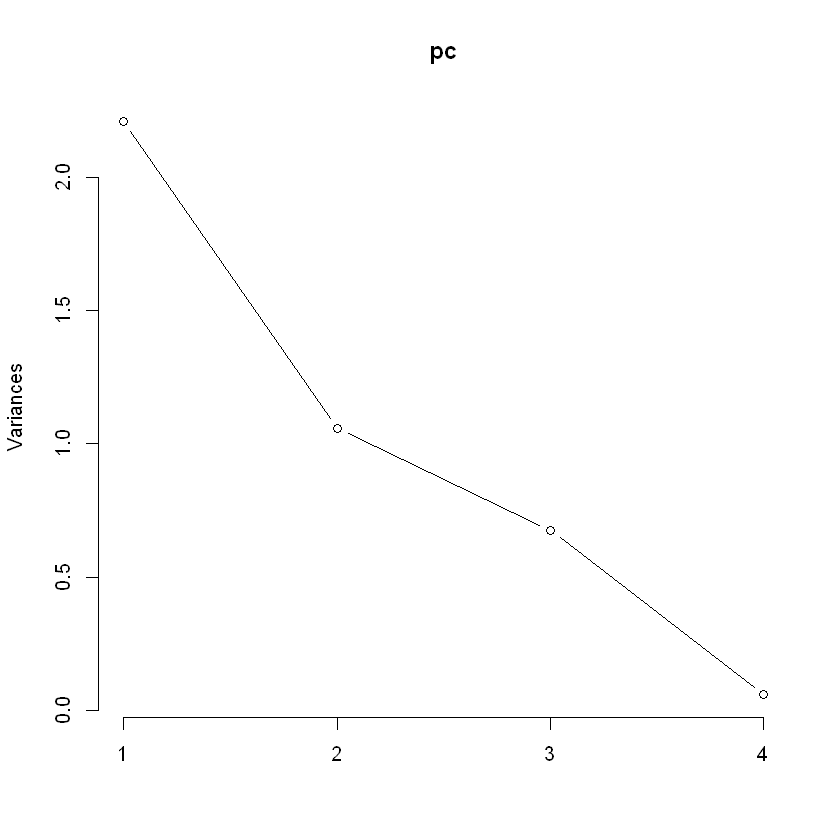

In [45]:
plot(pc, type = "l")

In [46]:
library(devtools)
install_github("ggbiplot", "vqv")
 

Warning message:
"Username parameter is deprecated. Please use vqv/ggbiplot"Skipping install of 'ggbiplot' from a github remote, the SHA1 (7325e880) has not changed since last install.
  Use `force = TRUE` to force installation


Loading required package: plyr
------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: 'plyr'

The following objects are masked from 'package:dplyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from 'package:purrr':

    compact

Loading required package: scales

Attaching package: 'scales'

The following object is masked from 'package:purrr':

    discard

The following object is masked from 'package:readr':

    col_factor

Loading required package: grid


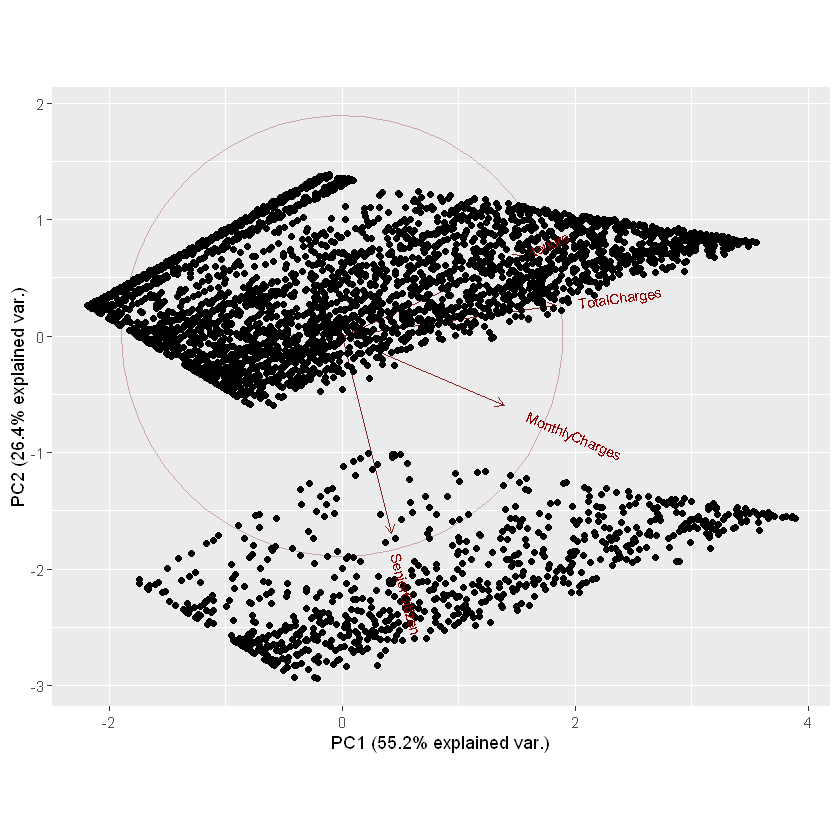

In [47]:
library(ggbiplot)
g <- ggbiplot(pc, obs.scale = 1, var.scale = 1, 
             , ellipse = TRUE, 
              circle = TRUE)
g <- g + scale_color_discrete(name = '')
g <- g + theme(legend.direction = 'horizontal', 
               legend.position = 'top')
print(g)

In [48]:
library(reshape, quietly=TRUE)



Attaching package: 'reshape'

The following objects are masked from 'package:plyr':

    rename, round_any

The following object is masked from 'package:dplyr':

    rename

The following objects are masked from 'package:tidyr':

    expand, smiths



Lets see Clustering Performance on this dataset

In [49]:
kmeansd <- kmeans(sapply(na.omit(telecom[train, numeric]), rescaler, "range"), 5)


In [50]:
kmeansd

K-means clustering with 5 clusters of sizes 800, 1072, 1066, 748, 1236

Cluster means:
  SeniorCitizen    tenure MonthlyCharges TotalCharges
1             1 0.4525528      0.6144037   0.31982374
2             0 0.8203306      0.7378899   0.62895164
3             0 0.1282007      0.1214962   0.03156576
4             0 0.7279883      0.1550836   0.20157929
5             0 0.1984024      0.6091578   0.13631955

Clustering vector:
   [1] 5 2 3 5 4 5 2 2 1 1 5 5 4 3 2 1 3 2 2 3 4 4 2 3 5 4 1 4 5 1 2 3 3 3 4 5 5
  [38] 4 3 1 1 2 1 2 2 3 5 2 5 5 5 1 1 5 5 4 1 3 2 4 2 5 4 5 1 3 4 2 2 3 3 2 3 3
  [75] 5 4 5 2 5 5 3 2 3 2 2 3 3 1 4 1 1 3 4 1 3 5 3 3 3 1 1 5 2 4 2 5 4 5 4 1 3
 [112] 1 4 5 2 5 5 4 2 3 4 3 2 2 5 5 5 4 4 2 3 1 1 2 2 5 1 4 4 4 3 3 1 4 5 3 1 2
 [149] 4 2 5 5 5 5 2 4 5 5 4 1 2 4 3 3 3 5 5 2 3 3 1 4 4 4 3 1 1 4 3 5 5 5 1 2 3
 [186] 2 3 1 5 3 4 5 4 4 4 1 5 3 2 4 3 1 5 1 2 3 5 2 3 3 4 1 1 1 5 5 1 1 5 4 5 3
 [223] 5 3 1 3 5 4 3 1 5 4 3 4 3 5 2 2 1 3 1 2 4 2 4 3 2 4 5 2 1 1 2 3 1 5 1 3 1
 [

In [51]:
install.packages('fpc')

Installing package into 'C:/Users/ajaohri/Documents/R/win-library/3.5'
(as 'lib' is unspecified)


package 'fpc' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ajaohri\AppData\Local\Temp\Rtmpsrvaah\downloaded_packages


In [52]:
install.packages('cluster')

Installing package into 'C:/Users/ajaohri/Documents/R/win-library/3.5'
(as 'lib' is unspecified)


package 'cluster' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ajaohri\AppData\Local\Temp\Rtmpsrvaah\downloaded_packages


In [53]:
library(cluster)
library(fpc)

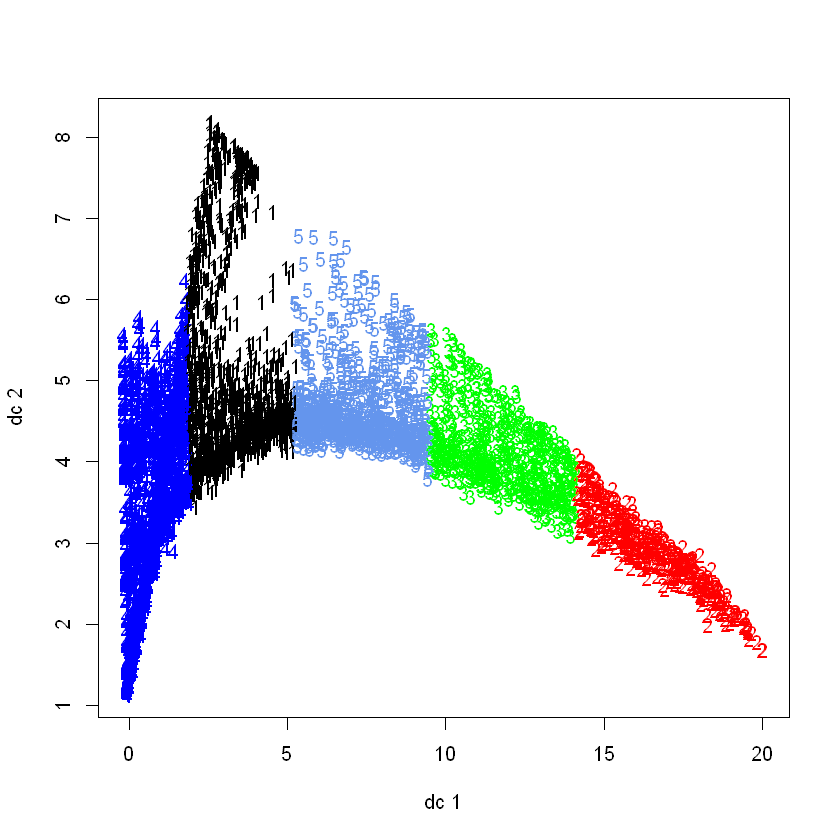

In [54]:
clus <- kmeans(telecom[train, numeric], centers=5)
plotcluster(telecom[train, numeric], clus$cluster)


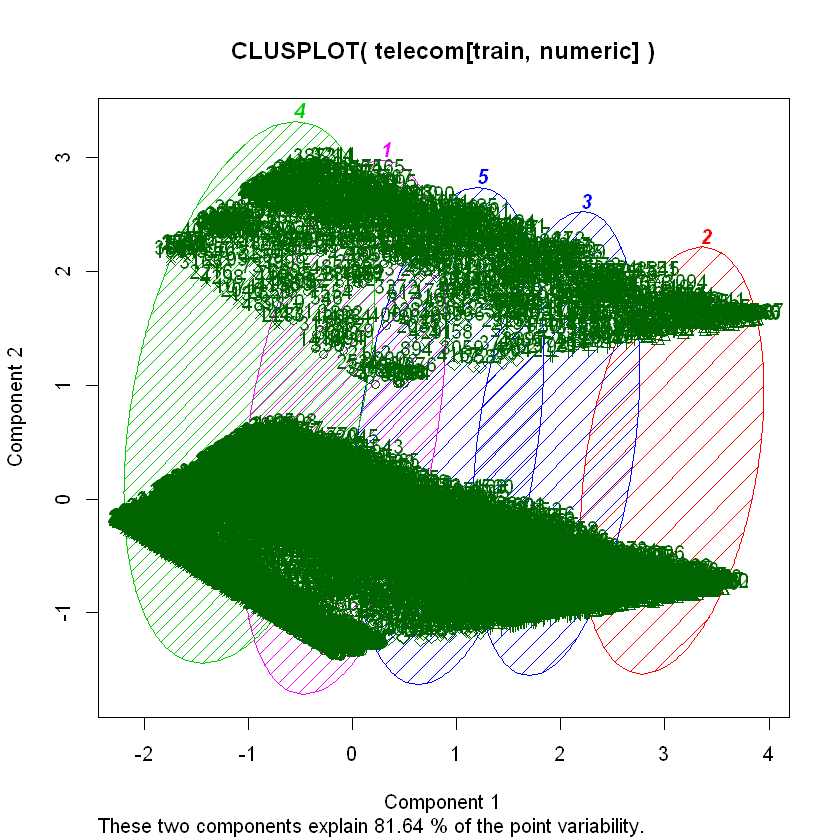

In [55]:
clusplot(telecom[train, numeric], clus$cluster, color=TRUE, shade=TRUE, 
         labels=2, lines=0)

In [56]:
install.packages('HSAUR')

Installing package into 'C:/Users/ajaohri/Documents/R/win-library/3.5'
(as 'lib' is unspecified)


package 'HSAUR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ajaohri\AppData\Local\Temp\Rtmpsrvaah\downloaded_packages


In [57]:
library(HSAUR)

Loading required package: tools


In [63]:


pam_k2 <- pam(telecom[train, numeric], k = 5)
 

In [65]:
pam_k2

Medoids:
       ID SeniorCitizen tenure MonthlyCharges TotalCharges
[1,] 2218             0     26          51.55       1295.4
[2,] 4504             0     54          89.40       4869.5
[3,] 3106             0      5          49.20        216.9
[4,] 3394             0     40          74.80       2971.7
[5,]  521             0     67         103.15       6895.5
Clustering vector:
   [1] 1 2 3 4 1 3 4 2 5 1 1 1 1 3 2 4 3 2 2 3 1 1 2 3 1 1 3 4 1 2 2 3 3 3 4 1 1
  [38] 1 3 5 2 4 3 5 2 3 3 5 3 3 1 2 4 3 3 4 2 3 2 1 5 1 4 1 3 3 1 5 2 3 3 2 3 3
  [75] 1 4 3 5 1 1 3 2 3 5 2 3 3 4 4 3 3 3 1 3 3 3 3 3 3 4 3 3 5 1 5 3 1 1 1 1 3
 [112] 2 1 3 5 3 4 1 5 3 1 3 4 2 4 4 3 1 4 5 3 3 3 2 4 1 4 1 1 1 3 3 5 1 3 3 2 2
 [149] 1 5 1 1 1 1 2 1 1 3 1 3 2 1 3 3 3 3 1 4 3 1 1 1 4 1 3 1 4 1 3 1 1 3 4 2 3
 [186] 5 3 5 3 3 1 1 1 1 1 3 4 3 5 1 3 4 3 5 4 3 3 2 3 3 4 5 3 4 3 3 4 2 3 1 1 3
 [223] 4 3 1 3 3 4 3 3 1 1 3 4 3 3 5 2 2 1 5 2 4 5 1 3 5 4 3 5 4 1 5 3 2 3 1 3 2
 [260] 3 1 4 2 4 4 3 4 1 3 3 3 1 1 2 2 1 3 4 1 4 3 

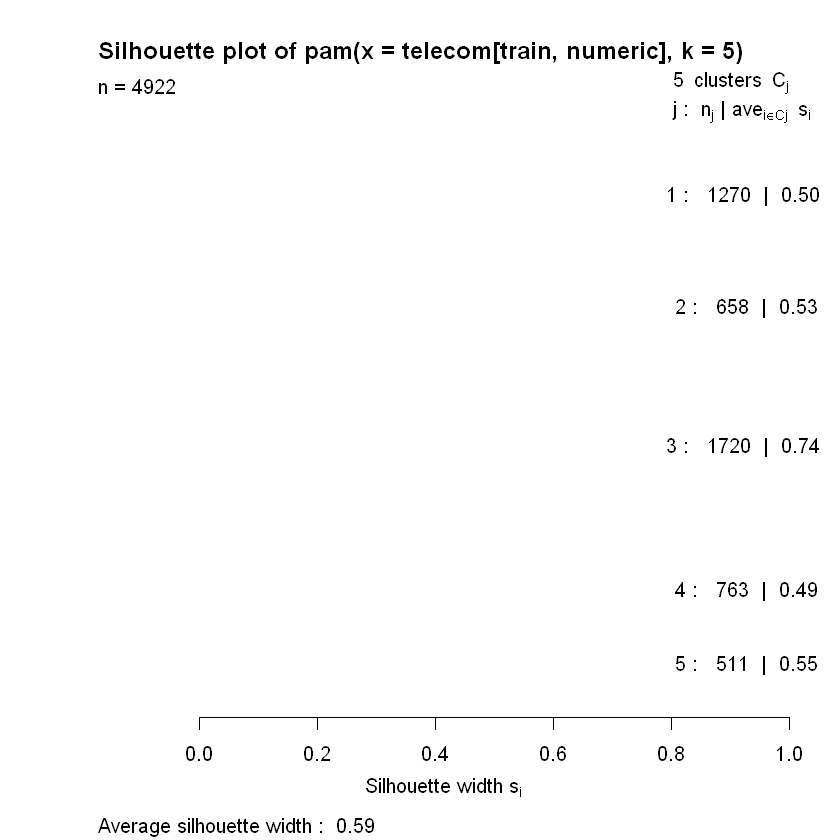

In [64]:
plot(silhouette(pam_k2))

In [ ]:
Values close to 1 suggest that the observation is well matched to the assigned cluster
Values close to 0 suggest that the observation is borderline matched between two clusters
Values close to -1 suggest that the observations may be assigned to the wrong cluster

In [66]:
pkgs <- c("factoextra",  "NbClust")
install.packages(pkgs)

Installing packages into 'C:/Users/ajaohri/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
also installing the dependencies 'ellipse', 'flashClust', 'leaps', 'scatterplot3d', 'ggsci', 'cowplot', 'ggsignif', 'polynom', 'dendextend', 'FactoMineR', 'ggpubr', 'ggrepel'



package 'ellipse' successfully unpacked and MD5 sums checked
package 'flashClust' successfully unpacked and MD5 sums checked
package 'leaps' successfully unpacked and MD5 sums checked
package 'scatterplot3d' successfully unpacked and MD5 sums checked
package 'ggsci' successfully unpacked and MD5 sums checked
package 'cowplot' successfully unpacked and MD5 sums checked
package 'ggsignif' successfully unpacked and MD5 sums checked
package 'polynom' successfully unpacked and MD5 sums checked
package 'dendextend' successfully unpacked and MD5 sums checked
package 'FactoMineR' successfully unpacked and MD5 sums checked
package 'ggpubr' successfully unpacked and MD5 sums checked
package 'ggrepel' successfully unpacked and MD5 sums checked
package 'factoextra' successfully unpacked and MD5 sums checked
package 'NbClust' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ajaohri\AppData\Local\Temp\Rtmpsrvaah\downloaded_packages


In [71]:
library(factoextra)
library(NbClust)

Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


fviz_nbclust(x, FUNcluster, method = c("silhouette", "wss", "gap_stat"))


x: numeric matrix or data frame
FUNcluster: a partitioning function. Allowed values include kmeans, pam, clara and hcut (for hierarchical clustering).
method: the method to be used for determining the optimal number of clusters.

#?fviz_nbclust
fviz_nbclust(x, FUNcluster = NULL, method = c("silhouette", "wss",
  "gap_stat"), diss = NULL, k.max = 10, nboot = 100,
  verbose = interactive(), barfill = "steelblue", barcolor = "steelblue",
  linecolor = "steelblue", print.summary = TRUE, ...)

fviz_gap_stat(gap_stat, linecolor = "steelblue", maxSE = list(method =
  "firstSEmax", SE.factor = 1))

In [76]:
x=telecom[train, numeric]
class(x)


[1] "tbl_df"     "tbl"        "data.frame"

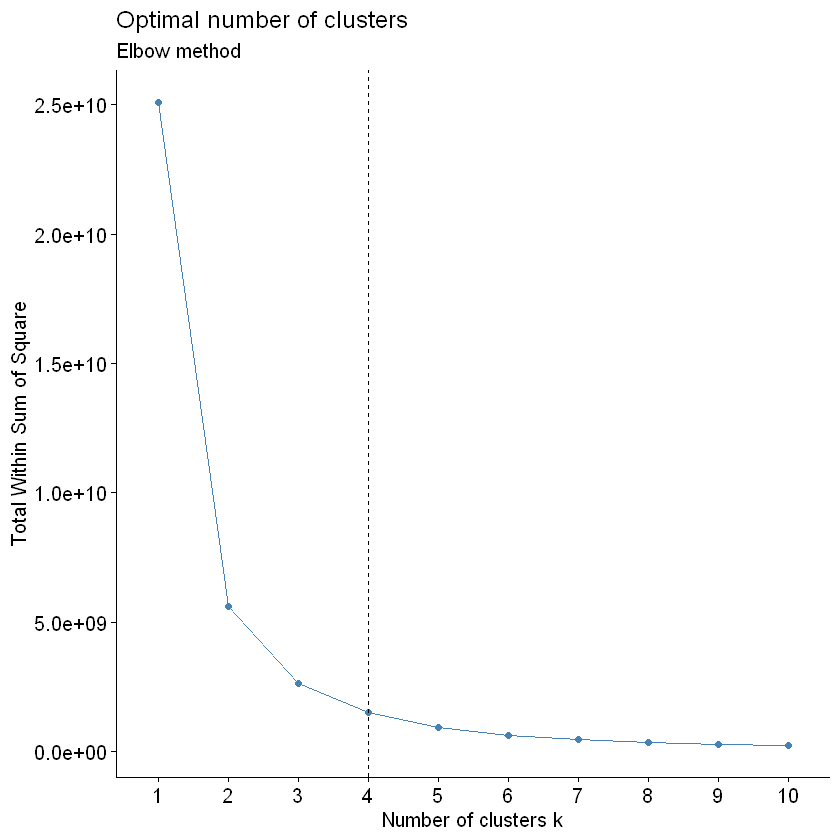

In [77]:
#elbow method
fviz_nbclust(x, kmeans, method = "wss") +
    geom_vline(xintercept = 4, linetype = 2)+
  labs(subtitle = "Elbow method")

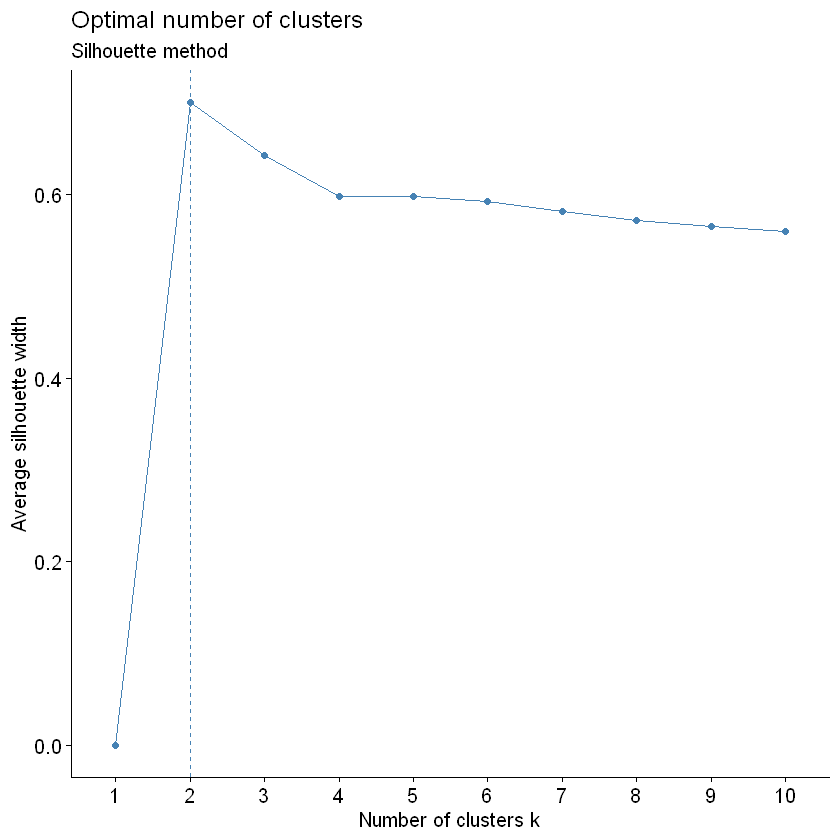

In [79]:
# Silhouette method
fviz_nbclust(x, kmeans, method = "silhouette")+
  labs(subtitle = "Silhouette method")
# Gap statistic
# nboot = 50 to keep the function speedy. 
# recommended value: nboot= 500 for your analysis.
# Use verbose = FALSE to hide computing progression.

Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 246100)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 246100)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 246100)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 246100)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 246100)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 246100)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 246100)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 246100)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 246100)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 246100)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 246100)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 246100)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 246100)"Warning message:
"Quick-TRANSfer stage steps exceed

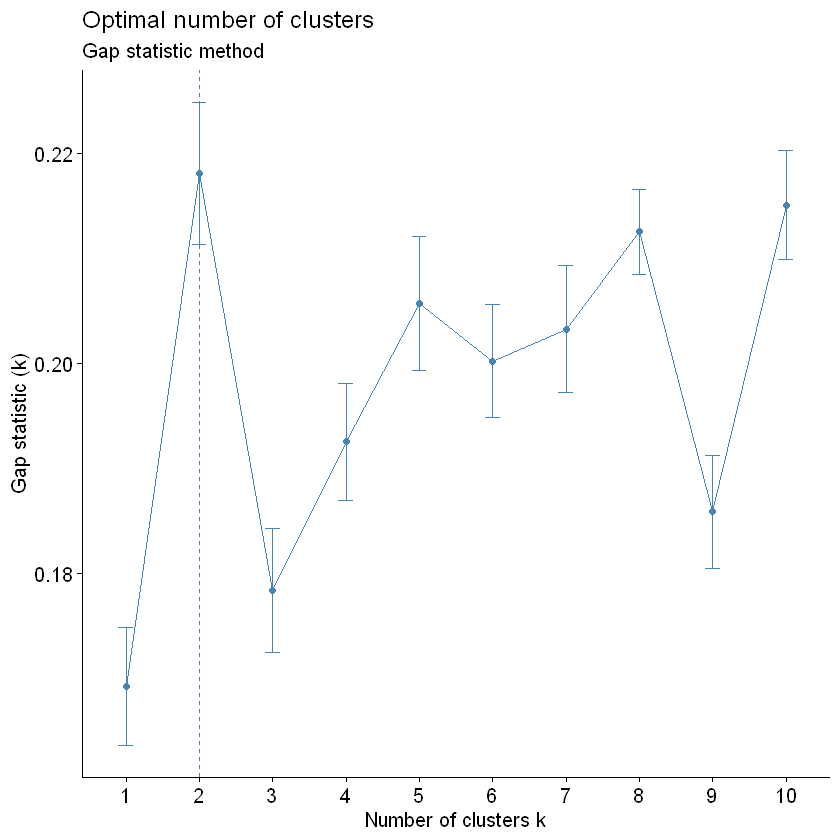

In [82]:
fviz_nbclust(x, kmeans, nstart = 25,  method = "gap_stat", nboot = 50,verbose = FALSE)+
  labs(subtitle = "Gap statistic method")

#### Gap statistic
#### nboot = 50 to keep the function speedy. 
#### recommended value: nboot= 500 for your analysis.
#### Use verbose = FALSE to hide computing progression.

Elbow method: 4 clusters solution suggested
Silhouette method: 2 clusters solution suggested
Gap statistic method: 2 clusters solution suggested

Hierachical Clustering

In [ ]:
hc.complete = hclust(dist(telecom[train, numeric]), method="complete")

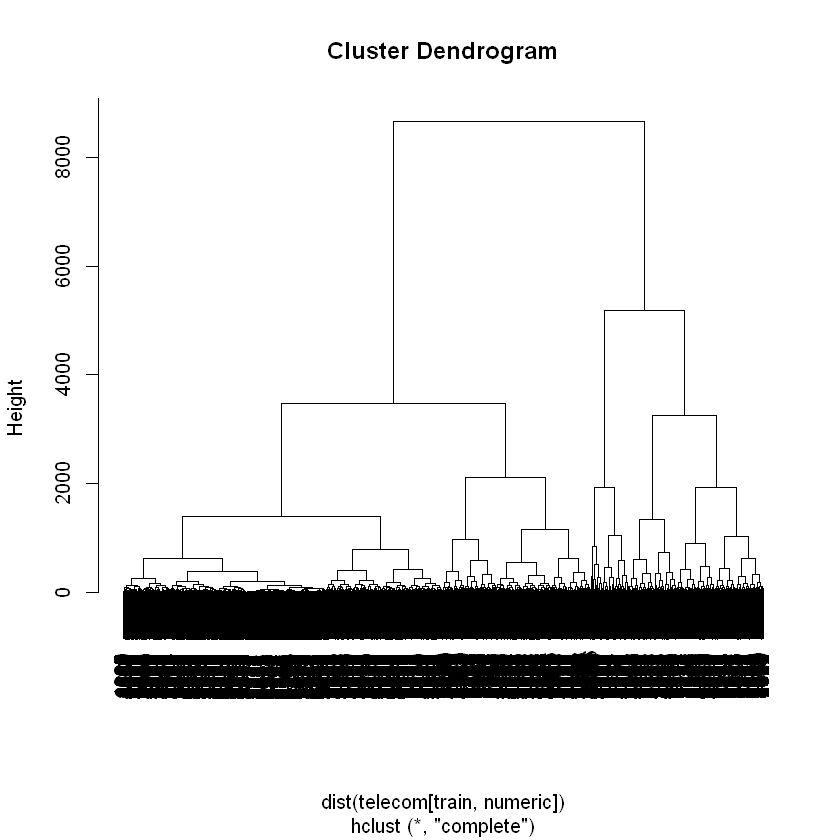

In [68]:
 plot(hc.complete)

In [90]:
kmeansd2=kmeans(telecom[train,numeric],4)

In [91]:
summary(kmeansd2)


             Length Class  Mode   
cluster      4922   -none- numeric
centers        16   -none- numeric
totss           1   -none- numeric
withinss        4   -none- numeric
tot.withinss    1   -none- numeric
betweenss       1   -none- numeric
size            4   -none- numeric
iter            1   -none- numeric
ifault          1   -none- numeric

In [92]:
paste(kmeansd2$size, collapse=' ')


[1] "861 1198 2222 641"

In [93]:
kmeansd2$centers


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
1,0.2044135,52.13821,83.27967,4209.0267
2,0.1786311,36.77713,63.92283,1943.5114
3,0.1215122,12.26643,47.98681,428.8383
4,0.2184087,66.51170,100.96552,6717.5934


In [95]:
kmeansd2$withinss


[1] 403034645 359852528 278986468 456154566

In [94]:
colMeans(sapply(na.omit(telecom[train, numeric]), rescaler, "range"))


SeniorCitizen         tenure MonthlyCharges   TotalCharges 
     0.1625356      0.4404427      0.4634249      0.2606698

DECISION TREE FOR CLASSIFICATION


In [173]:
install.packages('party')

Installing package into 'C:/Users/ajaohri/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
also installing the dependencies 'strucchange', 'coin'



package 'strucchange' successfully unpacked and MD5 sums checked
package 'coin' successfully unpacked and MD5 sums checked
package 'party' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ajaohri\AppData\Local\Temp\Rtmpsrvaah\downloaded_packages


In [198]:
library(caret)

In [118]:
require(pROC)


Loading required package: pROC
Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following objects are masked from 'package:stats':

    cov, smooth, var



In [175]:
library(party)

In [180]:
fit <- ctree(Churn ~ ., data=telecom[train, c(input, target)])

In [123]:
library(rattle)

Rattle: A free graphical interface for data science with R.
Version 5.2.0 Copyright (c) 2006-2018 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.


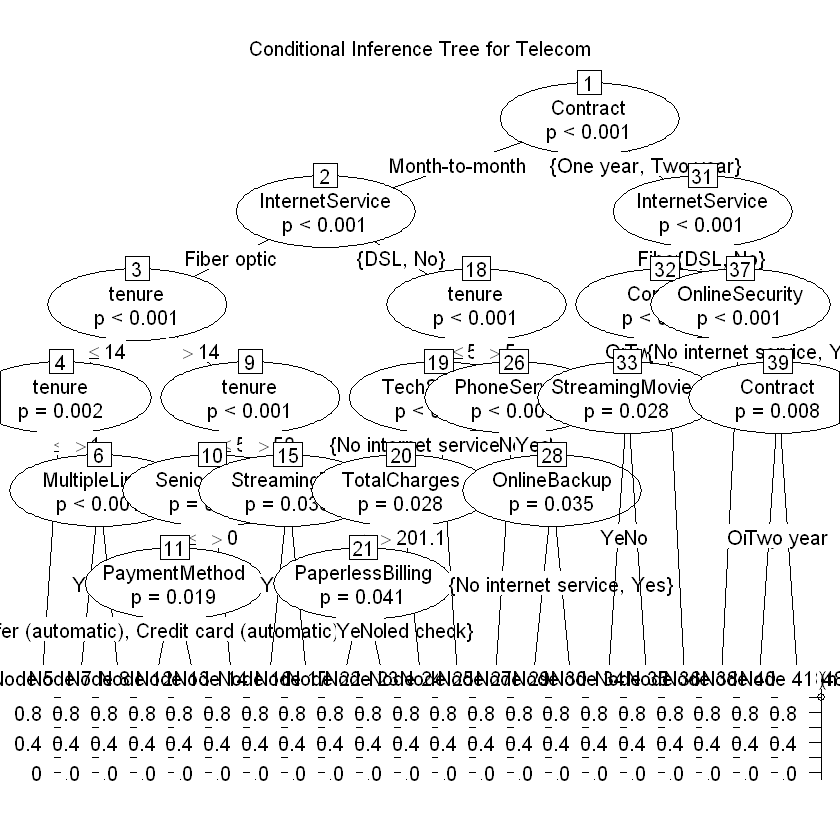

In [181]:
plot(fit, main="Conditional Inference Tree for Telecom")

In [183]:
fit


	 Conditional inference tree with 21 terminal nodes

Response:  Churn 
Inputs:  gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges 
Number of observations:  4922 

1) Contract == {Month-to-month}; criterion = 1, statistic = 808.24
  2) InternetService == {Fiber optic}; criterion = 1, statistic = 236.947
    3) tenure <= 14; criterion = 1, statistic = 136.203
      4) tenure <= 1; criterion = 0.998, statistic = 14.779
        5)*  weights = 168 
      4) tenure > 1
        6) MultipleLines == {Yes}; criterion = 0.999, statistic = 16.644
          7)*  weights = 245 
        6) MultipleLines == {No}
          8)*  weights = 277 
    3) tenure > 14
      9) tenure <= 50; criterion = 1, statistic = 23.537
        10) SeniorCitizen <= 0; criterion = 0.989, statistic = 16.021
        

In [182]:
summary(fit)


    Length      Class       Mode 
         1 BinaryTree         S4 

In [192]:
ctreep=predict(fit,telecom[validate,])
head(ctreep)

Churn
0.67460317
0.04294479
0.04294479
0.18721461
0.18721461
0.07094595


In [194]:
# Apply threshold of 0.50: p_class
ctreep2 <- ifelse(ctreep > 0.50, 1, 0)
head(ctreep2)

Churn
1
0
0
0
0
0


In [196]:
confusionMatrix(as.factor(ctreep2),as.factor(telecom[validate,]$Churn))


Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1347  242
         1  205  316
                                          
               Accuracy : 0.7882          
                 95% CI : (0.7701, 0.8054)
    No Information Rate : 0.7355          
    P-Value [Acc > NIR] : 1.207e-08       
                                          
                  Kappa : 0.4436          
 Mcnemar's Test P-Value : 0.08862         
                                          
            Sensitivity : 0.8679          
            Specificity : 0.5663          
         Pos Pred Value : 0.8477          
         Neg Pred Value : 0.6065          
             Prevalence : 0.7355          
         Detection Rate : 0.6384          
   Detection Prevalence : 0.7531          
      Balanced Accuracy : 0.7171          
                                          
       'Positive' Class : 0               
                                          

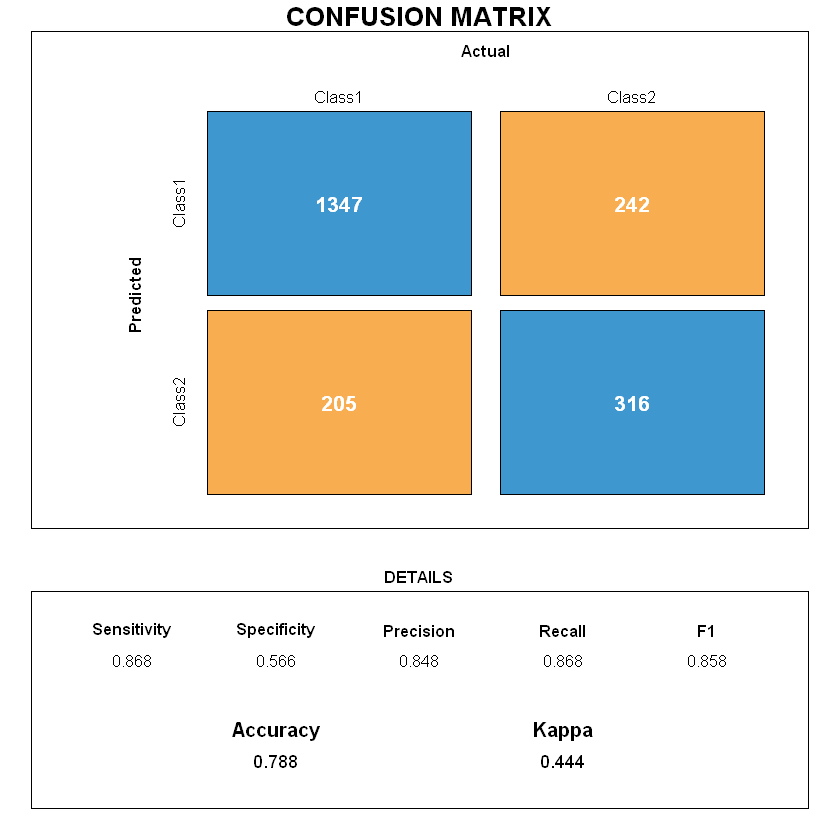

In [197]:
cm=confusionMatrix(as.factor(ctreep2),as.factor(telecom[validate,]$Churn))


draw_confusion_matrix <- function(cm) {

  layout(matrix(c(1,1,2)))
  par(mar=c(2,2,2,2))
  plot(c(100, 345), c(300, 450), type = "n", xlab="", ylab="", xaxt='n', yaxt='n')
  title('CONFUSION MATRIX', cex.main=2)

  # create the matrix 
  rect(150, 430, 240, 370, col='#3F97D0')
  text(195, 435, 'Class1', cex=1.2)
  rect(250, 430, 340, 370, col='#F7AD50')
  text(295, 435, 'Class2', cex=1.2)
  text(125, 370, 'Predicted', cex=1.3, srt=90, font=2)
  text(245, 450, 'Actual', cex=1.3, font=2)
  rect(150, 305, 240, 365, col='#F7AD50')
  rect(250, 305, 340, 365, col='#3F97D0')
  text(140, 400, 'Class1', cex=1.2, srt=90)
  text(140, 335, 'Class2', cex=1.2, srt=90)

  # add in the cm results 
  res <- as.numeric(cm$table)
  text(195, 400, res[1], cex=1.6, font=2, col='white')
  text(195, 335, res[2], cex=1.6, font=2, col='white')
  text(295, 400, res[3], cex=1.6, font=2, col='white')
  text(295, 335, res[4], cex=1.6, font=2, col='white')

  # add in the specifics 
  plot(c(100, 0), c(100, 0), type = "n", xlab="", ylab="", main = "DETAILS", xaxt='n', yaxt='n')
  text(10, 85, names(cm$byClass[1]), cex=1.2, font=2)
  text(10, 70, round(as.numeric(cm$byClass[1]), 3), cex=1.2)
  text(30, 85, names(cm$byClass[2]), cex=1.2, font=2)
  text(30, 70, round(as.numeric(cm$byClass[2]), 3), cex=1.2)
  text(50, 85, names(cm$byClass[5]), cex=1.2, font=2)
  text(50, 70, round(as.numeric(cm$byClass[5]), 3), cex=1.2)
  text(70, 85, names(cm$byClass[6]), cex=1.2, font=2)
  text(70, 70, round(as.numeric(cm$byClass[6]), 3), cex=1.2)
  text(90, 85, names(cm$byClass[7]), cex=1.2, font=2)
  text(90, 70, round(as.numeric(cm$byClass[7]), 3), cex=1.2)

  # add in the accuracy information 
  text(30, 35, names(cm$overall[1]), cex=1.5, font=2)
  text(30, 20, round(as.numeric(cm$overall[1]), 3), cex=1.4)
  text(70, 35, names(cm$overall[2]), cex=1.5, font=2)
  text(70, 20, round(as.numeric(cm$overall[2]), 3), cex=1.4)
}  

draw_confusion_matrix(cm)


In [199]:
roc_obj <- roc(telecom[validate,]$Churn, ctreep2)


Warning message in roc.default(telecom[validate, ]$Churn, ctreep2):
"Deprecated use a matrix as predictor. Unexpected results may be produced, please pass a numeric vector."

In [200]:
roc_obj$auc

Area under the curve: 0.7171

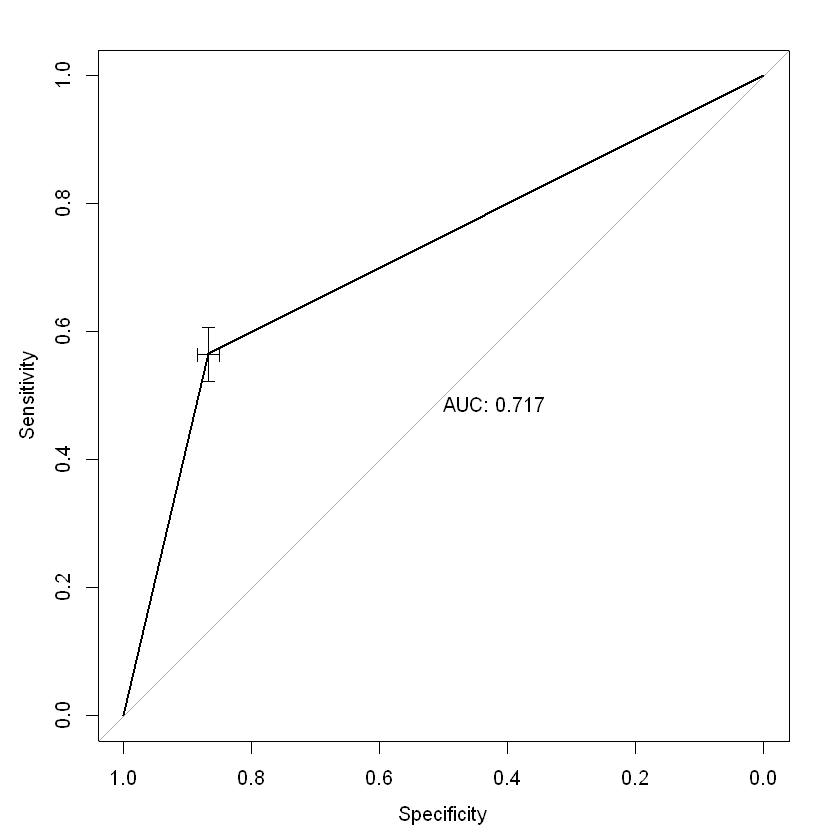

In [202]:
plot(roc_obj,  print.auc=TRUE)
plot(ci(roc_obj, of="thresholds", thresholds="best"))

# Decision Tree

In [96]:
library(rpart, quietly=TRUE)


In [97]:
# Build the Decision Tree model.

rpartd2 <- rpart(Churn ~ .,
                   data=telecom[train, c(input, target)],
                   method="class",
                   parms=list(split="information"),
                   control=rpart.control(usesurrogate=0, 
                                         maxsurrogate=0),
                   model=TRUE)

In [98]:
print(rpartd2)


n= 4922 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 4922 1311 0 (0.73364486 0.26635514)  
   2) Contract=One year,Two year 2174  146 0 (0.93284269 0.06715731) *
   3) Contract=Month-to-month 2748 1165 0 (0.57605531 0.42394469)  
     6) InternetService=DSL,No 1222  327 0 (0.73240589 0.26759411) *
     7) InternetService=Fiber optic 1526  688 1 (0.45085190 0.54914810)  
      14) tenure>=14.5 836  355 0 (0.57535885 0.42464115) *
      15) tenure< 14.5 690  207 1 (0.30000000 0.70000000) *


In [99]:
printcp(rpartd2)



Classification tree:
rpart(formula = Churn ~ ., data = telecom[train, c(input, target)], 
    method = "class", model = TRUE, parms = list(split = "information"), 
    control = rpart.control(usesurrogate = 0, maxsurrogate = 0))

Variables actually used in tree construction:
[1] Contract        InternetService tenure         

Root node error: 1311/4922 = 0.26636

n= 4922 

        CP nsplit rel error  xerror     xstd
1 0.057208      0   1.00000 1.00000 0.023656
2 0.010000      3   0.78947 0.79481 0.021861


In [100]:
summary(rpartd2) #  summary of splits


Call:
rpart(formula = Churn ~ ., data = telecom[train, c(input, target)], 
    method = "class", model = TRUE, parms = list(split = "information"), 
    control = rpart.control(usesurrogate = 0, maxsurrogate = 0))
  n= 4922 

          CP nsplit rel error    xerror       xstd
1 0.05720824      0 1.0000000 1.0000000 0.02365602
2 0.01000000      3 0.7894737 0.7948131 0.02186131

Variable importance
       Contract InternetService          tenure 
             72              18              10 

Node number 1: 4922 observations,    complexity param=0.05720824
  predicted class=0  expected loss=0.2663551  P(node) =1
    class counts:  3611  1311
   probabilities: 0.734 0.266 
  left son=2 (2174 obs) right son=3 (2748 obs)
  Primary splits:
      Contract        splits as  RLL,          improve=444.6479, (0 missing)
      TechSupport     splits as  RLL,          improve=310.5019, (0 missing)
      OnlineSecurity  splits as  RLL,          improve=308.5329, (0 missing)
      InternetService 

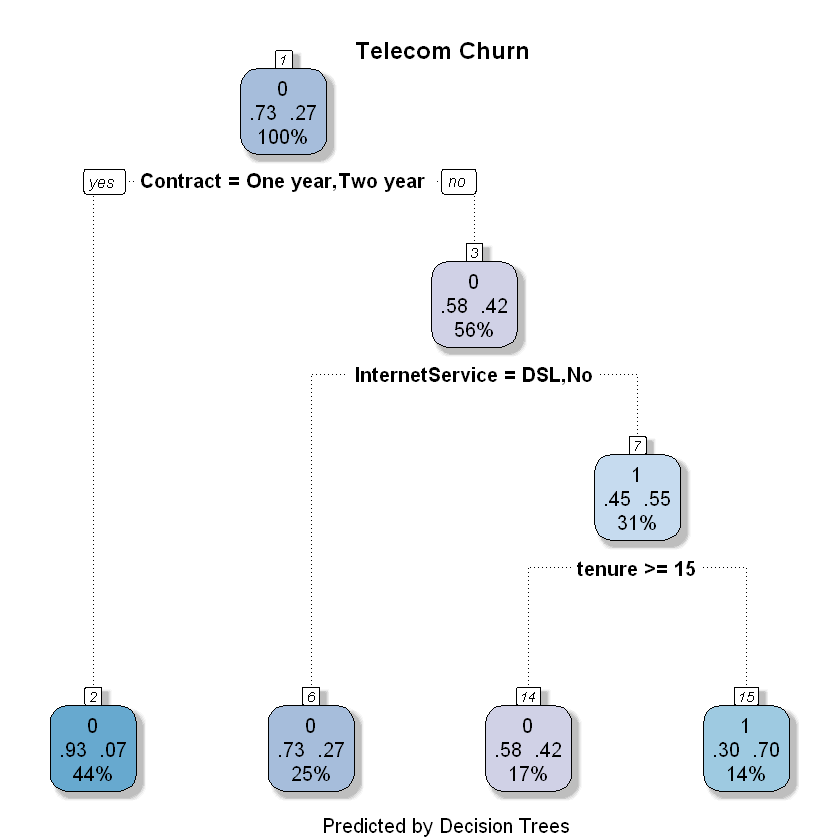

In [128]:
fancyRpartPlot(rpartd2, main="Telecom Churn",  , caption=' Predicted by Decision Trees', palettes='PuBuGn', type=2)


In [101]:
DTPred <- predict(rpartd2,type = "class", newdata = telecom[validate,])


In [112]:
str(DTPred)

 Factor w/ 2 levels "0","1": 1 1 1 1 1 1 2 1 1 2 ...
 - attr(*, "names")= chr [1:2110] "1" "2" "3" "4" ...


In [113]:
DTPred2=as.numeric(paste(DTPred))

In [115]:
str(DTPred2)

 num [1:2110] 0 0 0 0 0 0 1 0 0 1 ...


In [102]:
str(telecom[validate,21])


Classes 'tbl_df', 'tbl' and 'data.frame':	2110 obs. of  1 variable:
 $ Churn: num  0 0 0 1 1 0 0 0 1 1 ...


In [103]:
d=telecom[validate,]
head(d)
str(d)

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
8191-XWSZG,Female,0,No,No,52,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,0
4190-MFLUW,Female,0,Yes,Yes,10,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,No,Credit card (automatic),55.20,528.35,1
8773-HHUOZ,Female,0,No,Yes,17,Yes,No,DSL,No,...,No,No,Yes,Yes,Month-to-month,Yes,Mailed check,64.70,1093.10,1
3841-NFECX,Female,1,Yes,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,No,No,Two year,Yes,Credit card (automatic),96.35,6766.95,0


Classes 'tbl_df', 'tbl' and 'data.frame':	2110 obs. of  21 variables:
 $ customerID      : chr  "7590-VHVEG" "5575-GNVDE" "8191-XWSZG" "4190-MFLUW" ...
 $ gender          : Factor w/ 2 levels "Female","Male": 1 2 1 1 1 1 2 1 2 1 ...
 $ SeniorCitizen   : int  0 0 0 0 0 1 1 0 0 0 ...
 $ Partner         : Factor w/ 2 levels "No","Yes": 2 1 1 2 1 2 2 1 1 1 ...
 $ Dependents      : Factor w/ 2 levels "No","Yes": 1 1 1 2 2 1 1 1 1 1 ...
 $ tenure          : int  1 34 52 10 17 71 2 46 34 11 ...
 $ PhoneService    : Factor w/ 2 levels "No","Yes": 1 2 2 2 2 2 2 2 2 2 ...
 $ MultipleLines   : Factor w/ 3 levels "No","No phone service",..: 2 1 1 1 1 3 1 1 3 3 ...
 $ InternetService : Factor w/ 3 levels "DSL","Fiber optic",..: 1 1 3 1 1 2 2 2 2 2 ...
 $ OnlineSecurity  : Factor w/ 3 levels "No","No internet service",..: 1 3 2 1 1 3 1 1 1 1 ...
 $ OnlineBackup    : Factor w/ 3 levels "No","No internet service",..: 3 1 2 1 1 3 1 1 3 1 ...
 $ DeviceProtection: Factor w/ 3 levels "No","No internet ser

In [117]:
confusionMatrix(as.factor(DTPred2),as.factor(d$Churn))


Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1459  349
         1   93  209
                                          
               Accuracy : 0.7905          
                 95% CI : (0.7725, 0.8077)
    No Information Rate : 0.7355          
    P-Value [Acc > NIR] : 2.627e-09       
                                          
                  Kappa : 0.3688          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9401          
            Specificity : 0.3746          
         Pos Pred Value : 0.8070          
         Neg Pred Value : 0.6921          
             Prevalence : 0.7355          
         Detection Rate : 0.6915          
   Detection Prevalence : 0.8569          
      Balanced Accuracy : 0.6573          
                                          
       'Positive' Class : 0               
                                          

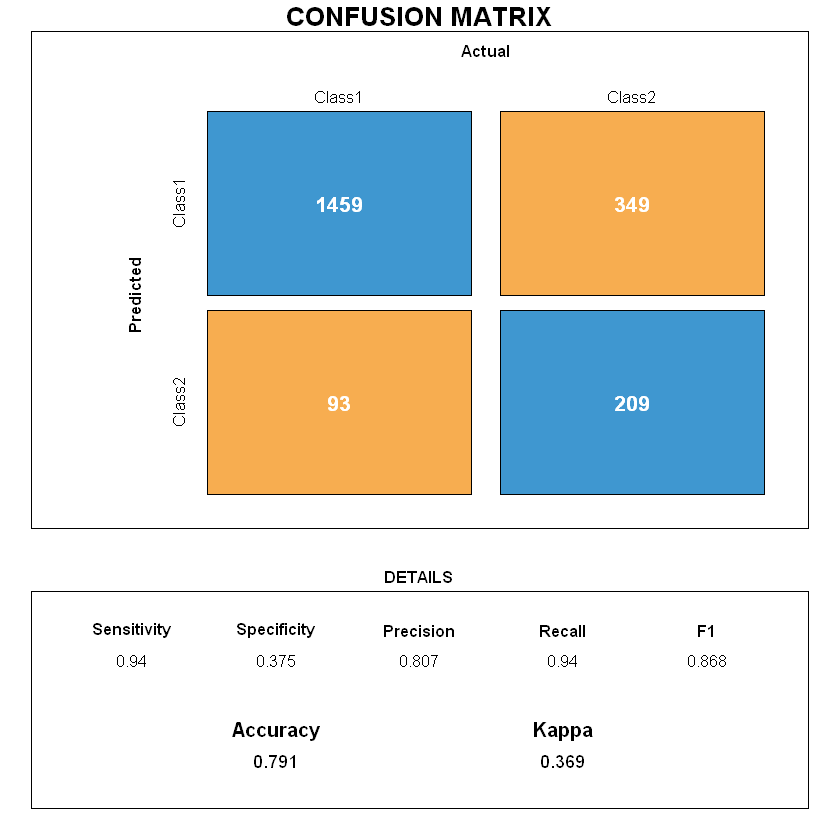

In [129]:
cm=confusionMatrix(as.factor(DTPred2),as.factor(d$Churn))

draw_confusion_matrix <- function(cm) {

  layout(matrix(c(1,1,2)))
  par(mar=c(2,2,2,2))
  plot(c(100, 345), c(300, 450), type = "n", xlab="", ylab="", xaxt='n', yaxt='n')
  title('CONFUSION MATRIX', cex.main=2)

  # create the matrix 
  rect(150, 430, 240, 370, col='#3F97D0')
  text(195, 435, 'Class1', cex=1.2)
  rect(250, 430, 340, 370, col='#F7AD50')
  text(295, 435, 'Class2', cex=1.2)
  text(125, 370, 'Predicted', cex=1.3, srt=90, font=2)
  text(245, 450, 'Actual', cex=1.3, font=2)
  rect(150, 305, 240, 365, col='#F7AD50')
  rect(250, 305, 340, 365, col='#3F97D0')
  text(140, 400, 'Class1', cex=1.2, srt=90)
  text(140, 335, 'Class2', cex=1.2, srt=90)

  # add in the cm results 
  res <- as.numeric(cm$table)
  text(195, 400, res[1], cex=1.6, font=2, col='white')
  text(195, 335, res[2], cex=1.6, font=2, col='white')
  text(295, 400, res[3], cex=1.6, font=2, col='white')
  text(295, 335, res[4], cex=1.6, font=2, col='white')

  # add in the specifics 
  plot(c(100, 0), c(100, 0), type = "n", xlab="", ylab="", main = "DETAILS", xaxt='n', yaxt='n')
  text(10, 85, names(cm$byClass[1]), cex=1.2, font=2)
  text(10, 70, round(as.numeric(cm$byClass[1]), 3), cex=1.2)
  text(30, 85, names(cm$byClass[2]), cex=1.2, font=2)
  text(30, 70, round(as.numeric(cm$byClass[2]), 3), cex=1.2)
  text(50, 85, names(cm$byClass[5]), cex=1.2, font=2)
  text(50, 70, round(as.numeric(cm$byClass[5]), 3), cex=1.2)
  text(70, 85, names(cm$byClass[6]), cex=1.2, font=2)
  text(70, 70, round(as.numeric(cm$byClass[6]), 3), cex=1.2)
  text(90, 85, names(cm$byClass[7]), cex=1.2, font=2)
  text(90, 70, round(as.numeric(cm$byClass[7]), 3), cex=1.2)

  # add in the accuracy information 
  text(30, 35, names(cm$overall[1]), cex=1.5, font=2)
  text(30, 20, round(as.numeric(cm$overall[1]), 3), cex=1.4)
  text(70, 35, names(cm$overall[2]), cex=1.5, font=2)
  text(70, 20, round(as.numeric(cm$overall[2]), 3), cex=1.4)
}  

draw_confusion_matrix(cm)


In [119]:
roc_obj <- roc(d$Churn, DTPred2)


In [121]:
roc_obj


Call:
roc.default(response = d$Churn, predictor = DTPred2)

Data: DTPred2 in 1552 controls (d$Churn 0) < 558 cases (d$Churn 1).
Area under the curve: 0.6573

In [120]:
auc(roc_obj)


Area under the curve: 0.6573

In [130]:
str(roc_obj)

List of 15
 $ percent           : logi FALSE
 $ sensitivities     : num [1:3] 1 0.375 0
 $ specificities     : num [1:3] 0 0.94 1
 $ thresholds        : num [1:3] -Inf 0.5 Inf
 $ direction         : chr "<"
 $ cases             : num [1:558] 0 0 0 1 0 1 1 1 0 1 ...
 $ controls          : num [1:1552] 0 0 0 0 1 0 0 0 0 0 ...
 $ fun.sesp          :function (thresholds, controls, cases, direction)  
 $ auc               : 'auc' num 0.657
  ..- attr(*, "partial.auc")= logi FALSE
  ..- attr(*, "percent")= logi FALSE
  ..- attr(*, "roc")=List of 15
  .. ..$ percent           : logi FALSE
  .. ..$ sensitivities     : num [1:3] 1 0.375 0
  .. ..$ specificities     : num [1:3] 0 0.94 1
  .. ..$ thresholds        : num [1:3] -Inf 0.5 Inf
  .. ..$ direction         : chr "<"
  .. ..$ cases             : num [1:558] 0 0 0 1 0 1 1 1 0 1 ...
  .. ..$ controls          : num [1:1552] 0 0 0 0 1 0 0 0 0 0 ...
  .. ..$ fun.sesp          :function (thresholds, controls, cases, direction)  
  .. ..$ auc  

In [132]:
 roc_obj$auc

Area under the curve: 0.6573

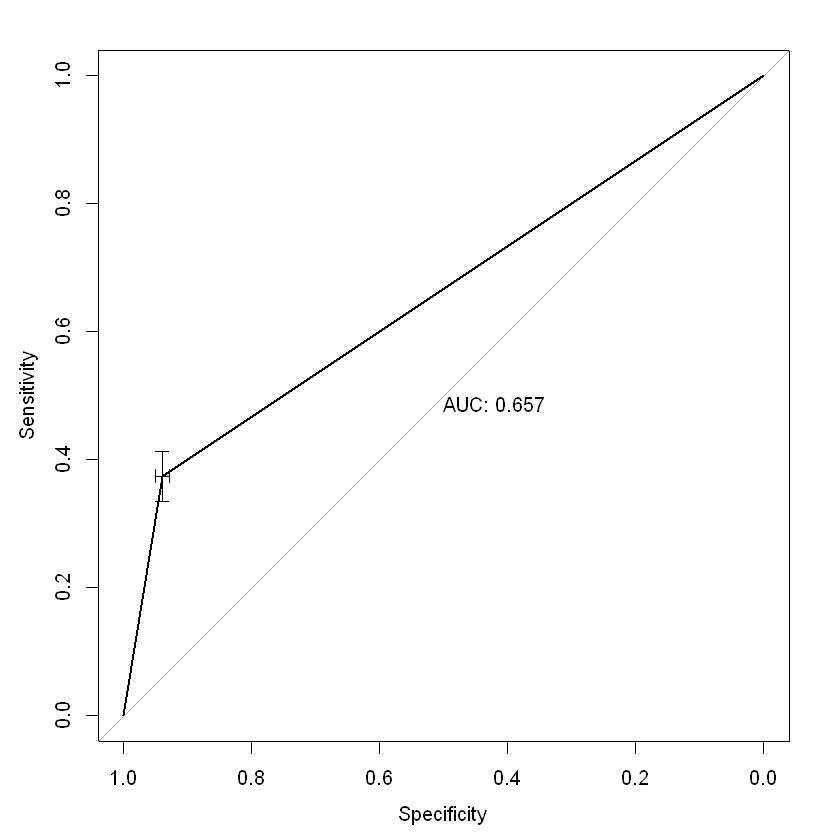

In [139]:
plot(roc_obj,  print.auc=TRUE)
plot(ci(roc_obj, of="thresholds", thresholds="best"))

#  RANDOM FOREST 

In [134]:
library(randomForest)


randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:rattle':

    importance

The following object is masked from 'package:dplyr':

    combine

The following object is masked from 'package:ggplot2':

    margin



In [140]:
rf2 <- randomForest::randomForest(Churn ~ .,
                                     data=telecom[train, c(input, target)], 
                                     ntree=500,
                                     mtry=4,
                                     importance=TRUE,
                                     na.action=randomForest::na.roughfix,
                                     replace=FALSE)

Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"

In [141]:
rf2



Call:
 randomForest(formula = Churn ~ ., data = telecom[train, c(input,      target)], ntree = 500, mtry = 4, importance = TRUE, replace = FALSE,      na.action = randomForest::na.roughfix) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 4

          Mean of squared residuals: 0.1372087
                    % Var explained: 29.78

In [170]:
getTree(rf2, 1, labelVar=TRUE)

left daughter,right daughter,split var,split point,status,prediction
2,3,TechSupport,6.000,-3,0.26904532
4,5,MonthlyCharges,98.400,-3,0.11745828
6,7,PaymentMethod,11.000,-3,0.42112041
8,9,tenure,17.500,-3,0.09862385
10,11,Dependents,2.000,-3,0.21600000
12,13,Partner,2.000,-3,0.30548303
14,15,OnlineBackup,6.000,-3,0.53367217
16,17,OnlineSecurity,2.000,-3,0.20000000
18,19,InternetService,5.000,-3,0.05233853
20,21,TotalCharges,5112.275,-3,0.12500000


In [142]:
# List the importance of the variables.

rn <- round(randomForest::importance(rf2), 2)

In [144]:
rn


,%IncMSE,IncNodePurity
gender,-1.47,8.02
SeniorCitizen,4.64,7.30
Partner,5.97,7.34
Dependents,5.67,6.86
tenure,46.32,66.62
PhoneService,6.93,1.89
MultipleLines,13.97,9.43
InternetService,25.45,21.59
OnlineSecurity,21.31,22.70
OnlineBackup,11.54,11.11


In [145]:
rn[order(rn[,1], decreasing=TRUE),]


,%IncMSE,IncNodePurity
tenure,46.32,66.62
TotalCharges,45.62,72.28
Contract,38.54,44.54
MonthlyCharges,34.54,61.10
InternetService,25.45,21.59
TechSupport,22.75,24.85
OnlineSecurity,21.31,22.70
PaperlessBilling,16.86,9.85
PaymentMethod,15.61,27.20
MultipleLines,13.97,9.43


In [146]:
nrow(telecom[validate,21])


[1] 2110

In [147]:
pred <- predict(rf2, newdata = telecom[validate,])


In [148]:
# Apply threshold of 0.50: p_class
rfpred <- ifelse(pred > 0.50, 1, 0)

In [149]:
table(rfpred)


rfpred
   0    1 
1682  428 

In [150]:
str(rfpred)


 Named num [1:2110] 1 0 0 0 0 0 1 0 1 1 ...
 - attr(*, "names")= chr [1:2110] "1" "2" "3" "4" ...


In [151]:
rfpred2=as.factor(rfpred)
str(rfpred2)

 Factor w/ 2 levels "0","1": 2 1 1 1 1 1 2 1 2 2 ...
 - attr(*, "names")= chr [1:2110] "1" "2" "3" "4" ...


In [152]:
table(telecom[validate,21])



   0    1 
1552  558 

In [153]:
obs2=as.factor(unlist(telecom[validate,21]))


In [154]:
str(obs2)


 Factor w/ 2 levels "0","1": 1 1 1 2 2 1 1 1 2 2 ...
 - attr(*, "names")= chr [1:2110] "Churn1" "Churn2" "Churn3" "Churn4" ...


In [156]:
table(rfpred2,obs2)


       obs2
rfpred2    0    1
      0 1392  290
      1  160  268

In [157]:
confusionMatrix(rfpred2,obs2)


Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1392  290
         1  160  268
                                         
               Accuracy : 0.7867         
                 95% CI : (0.7686, 0.804)
    No Information Rate : 0.7355         
    P-Value [Acc > NIR] : 2.914e-08      
                                         
                  Kappa : 0.4076         
 Mcnemar's Test P-Value : 1.193e-09      
                                         
            Sensitivity : 0.8969         
            Specificity : 0.4803         
         Pos Pred Value : 0.8276         
         Neg Pred Value : 0.6262         
             Prevalence : 0.7355         
         Detection Rate : 0.6597         
   Detection Prevalence : 0.7972         
      Balanced Accuracy : 0.6886         
                                         
       'Positive' Class : 0              
                                         

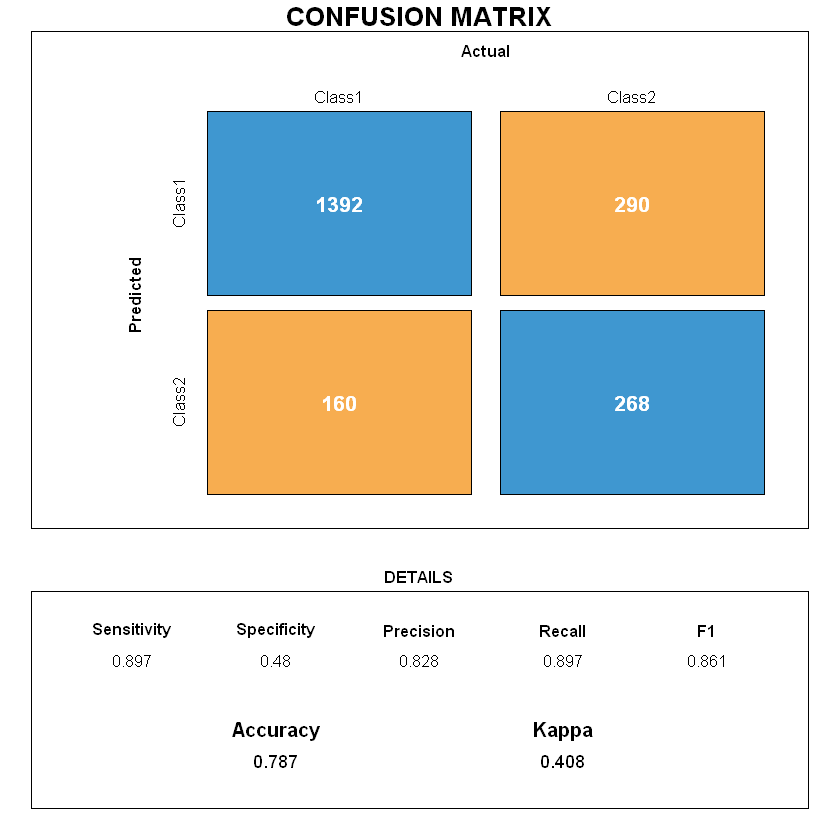

In [158]:
cm=confusionMatrix(rfpred2,obs2)

draw_confusion_matrix <- function(cm) {

  layout(matrix(c(1,1,2)))
  par(mar=c(2,2,2,2))
  plot(c(100, 345), c(300, 450), type = "n", xlab="", ylab="", xaxt='n', yaxt='n')
  title('CONFUSION MATRIX', cex.main=2)

  # create the matrix 
  rect(150, 430, 240, 370, col='#3F97D0')
  text(195, 435, 'Class1', cex=1.2)
  rect(250, 430, 340, 370, col='#F7AD50')
  text(295, 435, 'Class2', cex=1.2)
  text(125, 370, 'Predicted', cex=1.3, srt=90, font=2)
  text(245, 450, 'Actual', cex=1.3, font=2)
  rect(150, 305, 240, 365, col='#F7AD50')
  rect(250, 305, 340, 365, col='#3F97D0')
  text(140, 400, 'Class1', cex=1.2, srt=90)
  text(140, 335, 'Class2', cex=1.2, srt=90)

  # add in the cm results 
  res <- as.numeric(cm$table)
  text(195, 400, res[1], cex=1.6, font=2, col='white')
  text(195, 335, res[2], cex=1.6, font=2, col='white')
  text(295, 400, res[3], cex=1.6, font=2, col='white')
  text(295, 335, res[4], cex=1.6, font=2, col='white')

  # add in the specifics 
  plot(c(100, 0), c(100, 0), type = "n", xlab="", ylab="", main = "DETAILS", xaxt='n', yaxt='n')
  text(10, 85, names(cm$byClass[1]), cex=1.2, font=2)
  text(10, 70, round(as.numeric(cm$byClass[1]), 3), cex=1.2)
  text(30, 85, names(cm$byClass[2]), cex=1.2, font=2)
  text(30, 70, round(as.numeric(cm$byClass[2]), 3), cex=1.2)
  text(50, 85, names(cm$byClass[5]), cex=1.2, font=2)
  text(50, 70, round(as.numeric(cm$byClass[5]), 3), cex=1.2)
  text(70, 85, names(cm$byClass[6]), cex=1.2, font=2)
  text(70, 70, round(as.numeric(cm$byClass[6]), 3), cex=1.2)
  text(90, 85, names(cm$byClass[7]), cex=1.2, font=2)
  text(90, 70, round(as.numeric(cm$byClass[7]), 3), cex=1.2)

  # add in the accuracy information 
  text(30, 35, names(cm$overall[1]), cex=1.5, font=2)
  text(30, 20, round(as.numeric(cm$overall[1]), 3), cex=1.4)
  text(70, 35, names(cm$overall[2]), cex=1.5, font=2)
  text(70, 20, round(as.numeric(cm$overall[2]), 3), cex=1.4)
}  

draw_confusion_matrix(cm)


In [159]:
roc_obj <- roc(d$Churn, as.numeric(as.character(rfpred2)))
auc(roc_obj)


Area under the curve: 0.6886

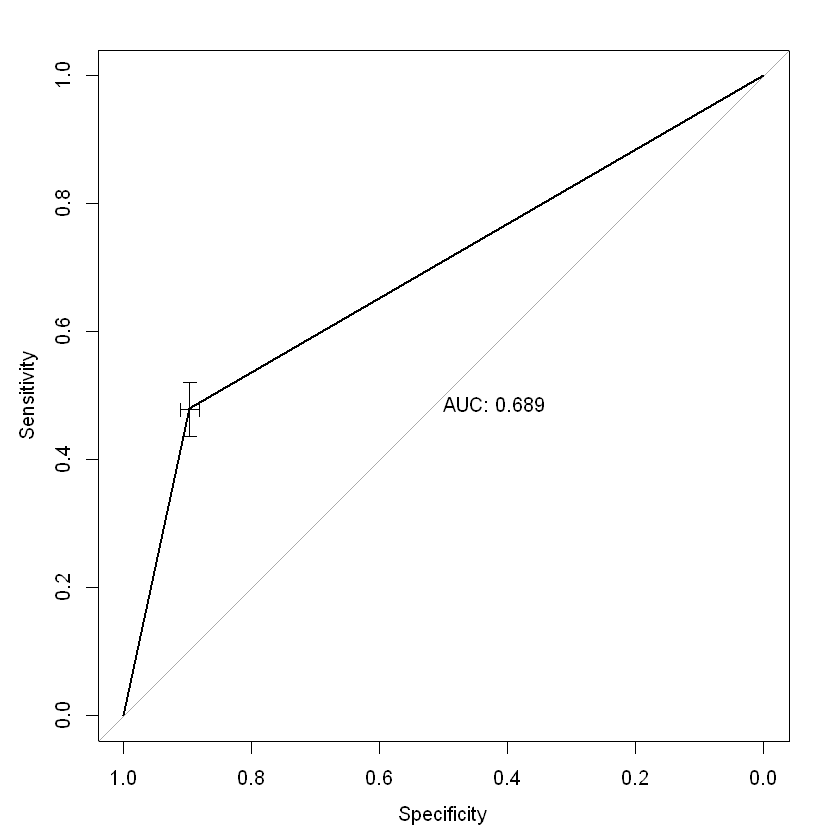

In [160]:
plot(roc_obj,  print.auc=TRUE)
plot(ci(roc_obj, of="thresholds", thresholds="best"))

# Support Vector Machine Model

In [161]:
library(kernlab, quietly=TRUE)



Attaching package: 'kernlab'

The following object is masked from 'package:scales':

    alpha

The following object is masked from 'package:purrr':

    cross

The following object is masked from 'package:ggplot2':

    alpha



In [162]:
ksvm2 <- ksvm(as.factor(Churn) ~ .,
                 data=telecom[train,c(input, target)],
                 kernel="rbfdot",
                 prob.model=TRUE)

In [163]:
ksvm2


Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 1 

Gaussian Radial Basis kernel function. 
 Hyperparameter : sigma =  0.080601249294862 

Number of Support Vectors : 2310 

Objective Function Value : -2034.5 
Training error : 0.185697 
Probability model included. 

In [164]:
predsvm <- predict(ksvm2, telecom[validate,])
str(predsvm)


 Factor w/ 2 levels "0","1": 2 1 1 1 1 1 2 1 1 2 ...


In [165]:
table(predsvm)


predsvm
   0    1 
1720  390 

In [166]:
confusionMatrix(predsvm,obs2)


Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1419  301
         1  133  257
                                          
               Accuracy : 0.7943          
                 95% CI : (0.7764, 0.8114)
    No Information Rate : 0.7355          
    P-Value [Acc > NIR] : 1.98e-10        
                                          
                  Kappa : 0.4149          
 Mcnemar's Test P-Value : 1.09e-15        
                                          
            Sensitivity : 0.9143          
            Specificity : 0.4606          
         Pos Pred Value : 0.8250          
         Neg Pred Value : 0.6590          
             Prevalence : 0.7355          
         Detection Rate : 0.6725          
   Detection Prevalence : 0.8152          
      Balanced Accuracy : 0.6874          
                                          
       'Positive' Class : 0               
                                          

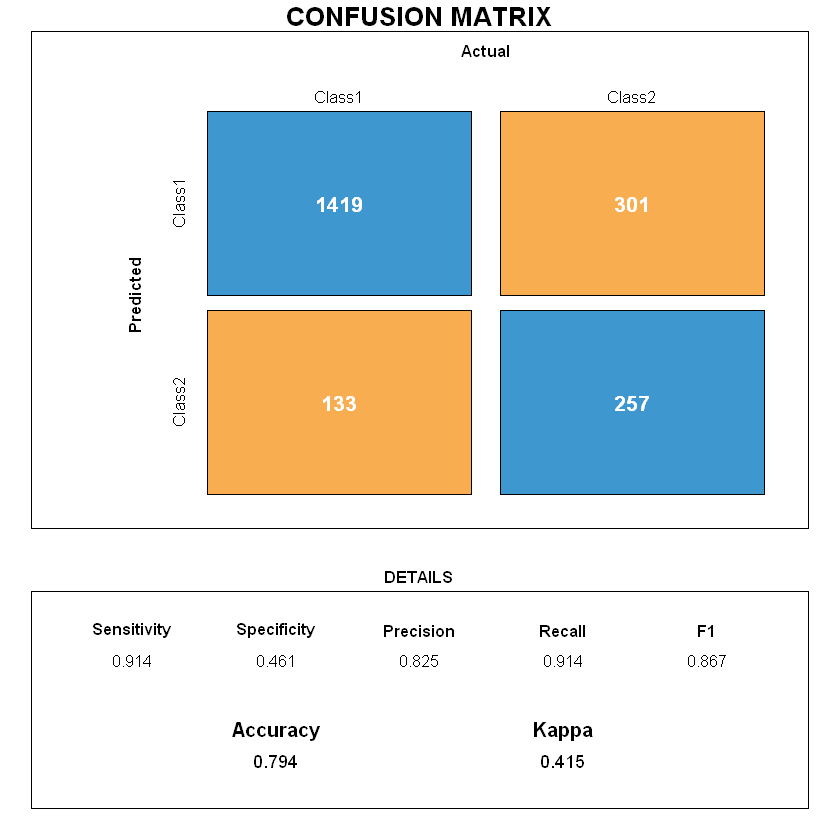

In [167]:
cm=confusionMatrix(predsvm,obs2)


draw_confusion_matrix <- function(cm) {

  layout(matrix(c(1,1,2)))
  par(mar=c(2,2,2,2))
  plot(c(100, 345), c(300, 450), type = "n", xlab="", ylab="", xaxt='n', yaxt='n')
  title('CONFUSION MATRIX', cex.main=2)

  # create the matrix 
  rect(150, 430, 240, 370, col='#3F97D0')
  text(195, 435, 'Class1', cex=1.2)
  rect(250, 430, 340, 370, col='#F7AD50')
  text(295, 435, 'Class2', cex=1.2)
  text(125, 370, 'Predicted', cex=1.3, srt=90, font=2)
  text(245, 450, 'Actual', cex=1.3, font=2)
  rect(150, 305, 240, 365, col='#F7AD50')
  rect(250, 305, 340, 365, col='#3F97D0')
  text(140, 400, 'Class1', cex=1.2, srt=90)
  text(140, 335, 'Class2', cex=1.2, srt=90)

  # add in the cm results 
  res <- as.numeric(cm$table)
  text(195, 400, res[1], cex=1.6, font=2, col='white')
  text(195, 335, res[2], cex=1.6, font=2, col='white')
  text(295, 400, res[3], cex=1.6, font=2, col='white')
  text(295, 335, res[4], cex=1.6, font=2, col='white')

  # add in the specifics 
  plot(c(100, 0), c(100, 0), type = "n", xlab="", ylab="", main = "DETAILS", xaxt='n', yaxt='n')
  text(10, 85, names(cm$byClass[1]), cex=1.2, font=2)
  text(10, 70, round(as.numeric(cm$byClass[1]), 3), cex=1.2)
  text(30, 85, names(cm$byClass[2]), cex=1.2, font=2)
  text(30, 70, round(as.numeric(cm$byClass[2]), 3), cex=1.2)
  text(50, 85, names(cm$byClass[5]), cex=1.2, font=2)
  text(50, 70, round(as.numeric(cm$byClass[5]), 3), cex=1.2)
  text(70, 85, names(cm$byClass[6]), cex=1.2, font=2)
  text(70, 70, round(as.numeric(cm$byClass[6]), 3), cex=1.2)
  text(90, 85, names(cm$byClass[7]), cex=1.2, font=2)
  text(90, 70, round(as.numeric(cm$byClass[7]), 3), cex=1.2)

  # add in the accuracy information 
  text(30, 35, names(cm$overall[1]), cex=1.5, font=2)
  text(30, 20, round(as.numeric(cm$overall[1]), 3), cex=1.4)
  text(70, 35, names(cm$overall[2]), cex=1.5, font=2)
  text(70, 20, round(as.numeric(cm$overall[2]), 3), cex=1.4)
}  

draw_confusion_matrix(cm)


In [168]:
roc_obj <- roc(d$Churn, as.numeric(as.character(predsvm)))
auc(roc_obj)

Area under the curve: 0.6874

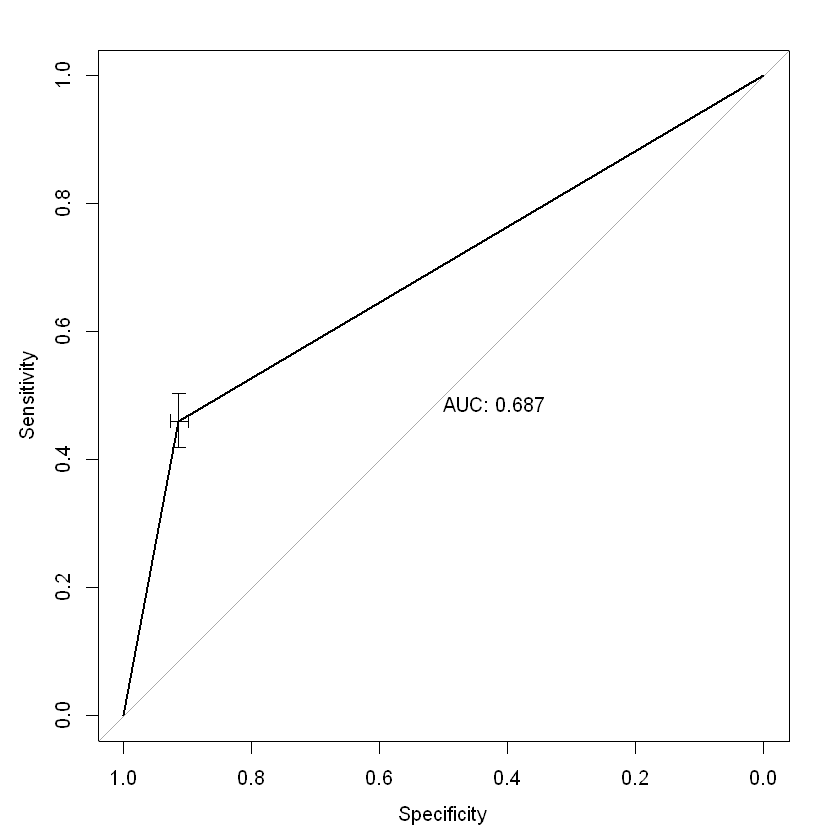

In [169]:
plot(roc_obj,  print.auc=TRUE)
plot(ci(roc_obj, of="thresholds", thresholds="best"))

# Generalized Linear Model

In [205]:
install.packages('glm2')

Installing package into 'C:/Users/ajaohri/Documents/R/win-library/3.5'
(as 'lib' is unspecified)


package 'glm2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ajaohri\AppData\Local\Temp\Rtmpsrvaah\downloaded_packages


In [206]:
library(glm2, quietly=TRUE)


In [207]:
glmd2 <- glm(Churn ~ .,
               data=telecom[train, c(input, target)],
               family=binomial(link="logit"))

In [208]:
# Generate a summary view of the Linear model.

print(summary(glmd2))


Call:
glm(formula = Churn ~ ., family = binomial(link = "logit"), data = telecom[train, 
    c(input, target)])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8820  -0.6711  -0.2869   0.7290   3.3582  

Coefficients: (7 not defined because of singularities)
                                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)                           1.372e+00  9.705e-01   1.414  0.15736    
genderMale                            1.597e-02  7.760e-02   0.206  0.83694    
SeniorCitizen                         1.875e-01  1.008e-01   1.860  0.06291 .  
PartnerYes                            7.001e-03  9.267e-02   0.076  0.93979    
DependentsYes                        -1.926e-01  1.064e-01  -1.809  0.07038 .  
tenure                               -6.283e-02  7.529e-03  -8.345  < 2e-16 ***
PhoneServiceYes                       2.015e-01  7.727e-01   0.261  0.79432    
MultipleLinesNo phone service                NA         NA      NA       NA  

In [209]:
mean((glmd2$fitted.values>0.5))


[1] 0.221861

In [210]:
predglm <- predict(glmd2, telecom[validate,])


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"

#### Profiling for confidence intervals

In [211]:
confint(glmd2)


Waiting for profiling to be done...


,2.5 %,97.5 %
(Intercept),-0.5293708185,3.2762905359
genderMale,-0.1361298256,0.1681223445
SeniorCitizen,-0.0102782988,0.3849960799
PartnerYes,-0.1745266879,0.1888442430
DependentsYes,-0.4019817367,0.0153865698
tenure,-0.0778815505,-0.0483595366
PhoneServiceYes,-1.3131136840,1.7169333860
MultipleLinesNo phone service,NA,NA
MultipleLinesYes,0.0222390688,0.8456025727
InternetServiceFiber optic,0.0888814591,3.8120316631


In [212]:
predglm2=scale(predglm)
summary(predglm2)

       V1         
 Min.   :-2.5461  
 1st Qu.:-0.7173  
 Median : 0.1807  
 Mean   : 0.0000  
 3rd Qu.: 0.8092  
 Max.   : 1.7549  

In [213]:
vars <- setdiff(colnames(telecom[train,]), c(target, ident))


In [214]:
vars


[1] "gender"           "SeniorCitizen"    "Partner"          "Dependents"      
 [5] "tenure"           "PhoneService"     "MultipleLines"    "InternetService" 
 [9] "OnlineSecurity"   "OnlineBackup"     "DeviceProtection" "TechSupport"     
[13] "StreamingTV"      "StreamingMovies"  "Contract"         "PaperlessBilling"
[17] "PaymentMethod"    "MonthlyCharges"   "TotalCharges"

In [345]:
telecom2 <- dummyVars(" ~ .", data = telecom[2:21])


In [346]:
testFrame2 <- data.frame(predict(telecom2, newdata = telecom[,2:21]))


In [347]:
str(testFrame2)

'data.frame':	7032 obs. of  46 variables:
 $ gender.Female                          : num  1 0 0 0 1 1 0 1 1 0 ...
 $ gender.Male                            : num  0 1 1 1 0 0 1 0 0 1 ...
 $ SeniorCitizen                          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Partner.No                             : num  0 1 1 1 1 1 1 1 0 1 ...
 $ Partner.Yes                            : num  1 0 0 0 0 0 0 0 1 0 ...
 $ Dependents.No                          : num  1 1 1 1 1 1 0 1 1 0 ...
 $ Dependents.Yes                         : num  0 0 0 0 0 0 1 0 0 1 ...
 $ tenure                                 : num  1 34 2 45 2 8 22 10 28 62 ...
 $ PhoneService.No                        : num  1 0 0 1 0 0 0 1 0 0 ...
 $ PhoneService.Yes                       : num  0 1 1 0 1 1 1 0 1 1 ...
 $ MultipleLines.No                       : num  0 1 1 0 1 0 0 0 0 1 ...
 $ MultipleLines.No.phone.service         : num  1 0 0 1 0 0 0 1 0 0 ...
 $ MultipleLines.Yes                      : num  0 0 0 0 0 1 1 0 1 0 ...
 $ 

In [348]:
head(testFrame2)


gender.Female,gender.Male,SeniorCitizen,Partner.No,Partner.Yes,Dependents.No,Dependents.Yes,tenure,PhoneService.No,PhoneService.Yes,...,Contract.Two.year,PaperlessBilling.No,PaperlessBilling.Yes,PaymentMethod.Bank.transfer..automatic.,PaymentMethod.Credit.card..automatic.,PaymentMethod.Electronic.check,PaymentMethod.Mailed.check,MonthlyCharges,TotalCharges,Churn
1,0,0,0,1,1,0,1,1,0,...,0,0,1,0,0,1,0,29.85,29.85,0
0,1,0,1,0,1,0,34,0,1,...,0,1,0,0,0,0,1,56.95,1889.50,0
0,1,0,1,0,1,0,2,0,1,...,0,0,1,0,0,0,1,53.85,108.15,1
0,1,0,1,0,1,0,45,1,0,...,0,1,0,1,0,0,0,42.30,1840.75,0
1,0,0,1,0,1,0,2,0,1,...,0,0,1,0,0,1,0,70.70,151.65,1
1,0,0,1,0,1,0,8,0,1,...,0,0,1,0,0,1,0,99.65,820.50,1


In [219]:
glmd2 <- glm(Churn ~ .,
               data=testFrame2[train,],
               family=binomial(link="logit"))

In [220]:
glmd2


Call:  glm(formula = Churn ~ ., family = binomial(link = "logit"), data = testFrame2[train, 
    ])

Coefficients:
                            (Intercept)  
                             -1.1071631  
                          gender.Female  
                             -0.0159709  
                            gender.Male  
                                     NA  
                          SeniorCitizen  
                              0.1874869  
                             Partner.No  
                             -0.0070006  
                            Partner.Yes  
                                     NA  
                          Dependents.No  
                              0.1925881  
                         Dependents.Yes  
                                     NA  
                                 tenure  
                             -0.0628280  
                        PhoneService.No  
                             -0.6350254  
                       PhoneService.Yes  
  

In [221]:
summary(glmd2)



Call:
glm(formula = Churn ~ ., family = binomial(link = "logit"), data = testFrame2[train, 
    ])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8820  -0.6711  -0.2869   0.7290   3.3582  

Coefficients: (22 not defined because of singularities)
                                          Estimate Std. Error z value Pr(>|z|)
(Intercept)                             -1.107e+00  9.852e-01  -1.124 0.261096
gender.Female                           -1.597e-02  7.760e-02  -0.206 0.836940
gender.Male                                     NA         NA      NA       NA
SeniorCitizen                            1.875e-01  1.008e-01   1.860 0.062909
Partner.No                              -7.001e-03  9.267e-02  -0.076 0.939785
Partner.Yes                                     NA         NA      NA       NA
Dependents.No                            1.926e-01  1.064e-01   1.809 0.070378
Dependents.Yes                                  NA         NA      NA       NA
tenure            

In [223]:
glmd3 <- glm(Churn ~ tenure +  Contract.Month.to.month  + PaperlessBilling.No  + TotalCharges                            ,
               data=testFrame2[train,],
               family=binomial(link="logit"))

In [224]:
AIC(glmd2)


[1] 4116.899

In [226]:
AIC(glmd3)


[1] 4412.512

In [225]:
summary(glmd3)



Call:
glm(formula = Churn ~ tenure + Contract.Month.to.month + PaperlessBilling.No + 
    TotalCharges, family = binomial(link = "logit"), data = testFrame2[train, 
    ])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3950  -0.7788  -0.3312   0.9807   3.3860  

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)             -9.363e-01  1.395e-01  -6.712 1.92e-11 ***
tenure                  -8.834e-02  6.295e-03 -14.033  < 2e-16 ***
Contract.Month.to.month  1.454e+00  1.164e-01  12.490  < 2e-16 ***
PaperlessBilling.No     -8.032e-01  8.285e-02  -9.695  < 2e-16 ***
TotalCharges             7.177e-04  6.086e-05  11.793  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 5705.6  on 4921  degrees of freedom
Residual deviance: 4402.5  on 4917  degrees of freedom
AIC: 4412.5

Number of Fisher Scoring iterations: 6


In [227]:
anova(glmd3,glmd2, test="Chisq")


Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
4917,4402.512,NA,NA,NA
4898,4068.899,19,333.6127,2.46425e-59


In [229]:
predglm=predict(glmd3, newdata=testFrame2[validate,], type="response")


In [230]:
head(predglm)


1           2          17          19          30          31 
0.610877676 0.032705407 0.003687868 0.312274442 0.450339885 0.086940300

In [231]:
summary(table(predglm))


Number of cases in table: 2110 
Number of factors: 1 

In [232]:
predglm2=ifelse(predglm>= 0.5,1,0)


In [233]:
head(predglm2)


1  2 17 19 30 31 
 1  0  0  0  0  0

In [236]:
table(predglm2)

predglm2
   0    1 
1659  451 

In [235]:
confusionMatrix(as.factor(predglm2),as.factor(obs2))


Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1364  295
         1  188  263
                                          
               Accuracy : 0.7711          
                 95% CI : (0.7526, 0.7889)
    No Information Rate : 0.7355          
    P-Value [Acc > NIR] : 9.582e-05       
                                          
                  Kappa : 0.3731          
 Mcnemar's Test P-Value : 1.413e-06       
                                          
            Sensitivity : 0.8789          
            Specificity : 0.4713          
         Pos Pred Value : 0.8222          
         Neg Pred Value : 0.5831          
             Prevalence : 0.7355          
         Detection Rate : 0.6464          
   Detection Prevalence : 0.7863          
      Balanced Accuracy : 0.6751          
                                          
       'Positive' Class : 0               
                                          

In [449]:
roc_objl <- roc(d$Churn, as.numeric(as.character(predglm2)))
auc(roc_objl)

Area under the curve: 0.6751

In [241]:
str(roc_obj)

List of 15
 $ percent           : logi FALSE
 $ sensitivities     : num [1:3] 1 0.471 0
 $ specificities     : num [1:3] 0 0.879 1
 $ thresholds        : num [1:3] -Inf 0.5 Inf
 $ direction         : chr "<"
 $ cases             : num [1:558] 0 0 1 1 1 1 1 1 0 1 ...
 $ controls          : num [1:1552] 1 0 0 0 1 0 0 1 0 0 ...
 $ fun.sesp          :function (thresholds, controls, cases, direction)  
 $ auc               : 'auc' num 0.675
  ..- attr(*, "partial.auc")= logi FALSE
  ..- attr(*, "percent")= logi FALSE
  ..- attr(*, "roc")=List of 15
  .. ..$ percent           : logi FALSE
  .. ..$ sensitivities     : num [1:3] 1 0.471 0
  .. ..$ specificities     : num [1:3] 0 0.879 1
  .. ..$ thresholds        : num [1:3] -Inf 0.5 Inf
  .. ..$ direction         : chr "<"
  .. ..$ cases             : num [1:558] 0 0 1 1 1 1 1 1 0 1 ...
  .. ..$ controls          : num [1:1552] 1 0 0 0 1 0 0 1 0 0 ...
  .. ..$ fun.sesp          :function (thresholds, controls, cases, direction)  
  .. ..$ auc

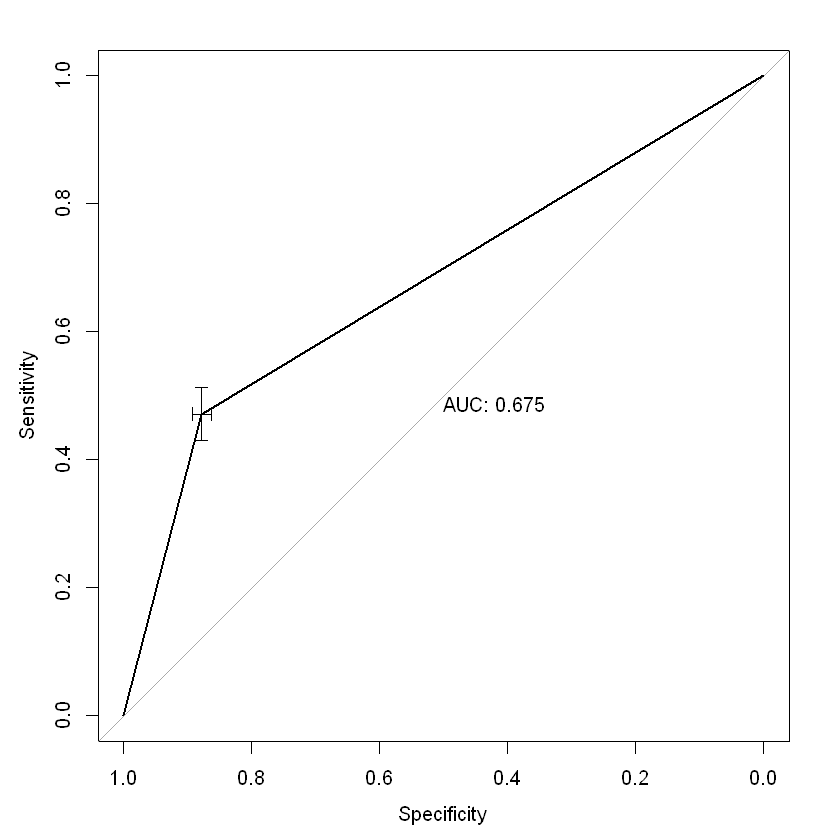

In [240]:
plot(roc_obj,  print.auc=TRUE)
plot(ci(roc_obj, of="thresholds", thresholds="best"))

# Naive Bayes

In [283]:
library(e1071)


In [284]:
NBclassfier=naiveBayes(as.factor(Churn) ~ .,
                 data=telecom[train,c(input, target)],
                 kernel="rbfdot",
                 prob.model=TRUE)
print(NBclassfier)


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace, kernel = "rbfdot", 
    prob.model = TRUE)

A-priori probabilities:
Y
        0         1 
0.7336449 0.2663551 

Conditional probabilities:
   gender
Y      Female      Male
  0 0.4973691 0.5026309
  1 0.4973303 0.5026697

   SeniorCitizen
Y        [,1]      [,2]
  0 0.1284963 0.3346879
  1 0.2562929 0.4367521

   Partner
Y          No       Yes
  0 0.4749377 0.5250623
  1 0.6331045 0.3668955

   Dependents
Y          No       Yes
  0 0.6554971 0.3445029
  1 0.8260870 0.1739130

   tenure
Y       [,1]     [,2]
  0 37.34589 23.91713
  1 18.29443 19.66037

   PhoneService
Y           No        Yes
  0 0.09526447 0.90473553
  1 0.08695652 0.91304348

   MultipleLines
Y           No No phone service        Yes
  0 0.48989200       0.09526447 0.41484353
  1 0.44851259       0.08695652 0.46453089

   InternetService
Y          DSL Fiber optic         No
  0 0.37468845  0.35059540 0.2747

In [292]:
 summary( NBclassfier)

        Length Class  Mode     
apriori  2     table  numeric  
tables  19     -none- list     
levels   2     -none- character
call     6     -none- call     

In [293]:
 testPred=predict(NBclassfier, newdata=telecom[validate,], type="class")

Warning message in data.matrix(newdata):
"NAs introduced by coercion"

In [295]:
summary(testPred)

0    1 
1207  903

In [297]:
table(testPred,telecom[validate,]$Churn)


        
testPred    0    1
       0 1089  118
       1  463  440

In [299]:
confusionMatrix(as.factor(testPred),as.factor(telecom[validate,]$Churn))


Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1089  118
         1  463  440
                                         
               Accuracy : 0.7246         
                 95% CI : (0.705, 0.7436)
    No Information Rate : 0.7355         
    P-Value [Acc > NIR] : 0.8767         
                                         
                  Kappa : 0.4092         
 Mcnemar's Test P-Value : <2e-16         
                                         
            Sensitivity : 0.7017         
            Specificity : 0.7885         
         Pos Pred Value : 0.9022         
         Neg Pred Value : 0.4873         
             Prevalence : 0.7355         
         Detection Rate : 0.5161         
   Detection Prevalence : 0.5720         
      Balanced Accuracy : 0.7451         
                                         
       'Positive' Class : 0              
                                         

In [301]:
roc_obj7 <- roc(d$Churn, as.numeric(as.character(testPred)))
auc(roc_obj7)

Area under the curve: 0.7451

In [271]:
library(ggplot2)

In [450]:
roc_objl <- roc(d$Churn, as.numeric(as.character(predglm2)))
auc(roc_objl)



Area under the curve: 0.6751

In [452]:
round(roc_objl$auc,3) #linear model

[1] 0.675

In [272]:
roc_obj1 <- roc(d$Churn, as.numeric(as.character(predsvm)))
round(roc_obj1$auc,3) #SVM Model

[1] 0.687

In [274]:
roc_obj0 <- roc(telecom[validate,]$Churn, ctreep2)
round(roc_obj0$auc,3) #conditional trees

Warning message in roc.default(telecom[validate, ]$Churn, ctreep2):
"Deprecated use a matrix as predictor. Unexpected results may be produced, please pass a numeric vector."

[1] 0.717

In [277]:
roc_obj4 <- roc(d$Churn, DTPred2)
round(roc_obj4$auc,3) #Decision trees

[1] 0.657

In [282]:
roc_obj5 <- roc(d$Churn, as.numeric(as.character(rfpred2)))
round(roc_obj5$auc,3) #Random Forest

[1] 0.689

# XGBoost

In [318]:
install.packages("xgboost")


Installing package into 'C:/Users/ajaohri/Documents/R/win-library/3.5'
(as 'lib' is unspecified)


package 'xgboost' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ajaohri\AppData\Local\Temp\Rtmpsrvaah\downloaded_packages


In [326]:
install.packages('mlr')

Installing package into 'C:/Users/ajaohri/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
also installing the dependencies 'fastmatch', 'ParamHelpers', 'BBmisc', 'parallelMap'



package 'fastmatch' successfully unpacked and MD5 sums checked
package 'ParamHelpers' successfully unpacked and MD5 sums checked
package 'BBmisc' successfully unpacked and MD5 sums checked
package 'parallelMap' successfully unpacked and MD5 sums checked
package 'mlr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ajaohri\AppData\Local\Temp\Rtmpsrvaah\downloaded_packages


In [327]:
numeric

[1] "SeniorCitizen"  "tenure"         "MonthlyCharges" "TotalCharges"

In [328]:
ident

[1] "customerID"

In [329]:
target

[1] "Churn"

In [330]:
categoric

[1] "gender"           "Partner"          "Dependents"       "PhoneService"    
 [5] "MultipleLines"    "InternetService"  "OnlineSecurity"   "OnlineBackup"    
 [9] "DeviceProtection" "TechSupport"      "StreamingTV"      "StreamingMovies" 
[13] "Contract"         "PaperlessBilling" "PaymentMethod"

In [331]:
library(data.table)
library(mlr)

Loading required package: ParamHelpers

Attaching package: 'mlr'

The following object is masked from 'package:e1071':

    impute

The following object is masked from 'package:caret':

    train



In [390]:
telecom2 <- dummyVars(" ~ .", data = telecom[2:21])


In [391]:
class(telecom2)

[1] "dummyVars"

In [392]:
trf2=data.frame(predict(telecom2, newdata = telecom[2:21]))
head(trf2)
str(trf2)

gender.Female,gender.Male,SeniorCitizen,Partner.No,Partner.Yes,Dependents.No,Dependents.Yes,tenure,PhoneService.No,PhoneService.Yes,...,Contract.Two.year,PaperlessBilling.No,PaperlessBilling.Yes,PaymentMethod.Bank.transfer..automatic.,PaymentMethod.Credit.card..automatic.,PaymentMethod.Electronic.check,PaymentMethod.Mailed.check,MonthlyCharges,TotalCharges,Churn
1,0,0,0,1,1,0,1,1,0,...,0,0,1,0,0,1,0,29.85,29.85,0
0,1,0,1,0,1,0,34,0,1,...,0,1,0,0,0,0,1,56.95,1889.50,0
0,1,0,1,0,1,0,2,0,1,...,0,0,1,0,0,0,1,53.85,108.15,1
0,1,0,1,0,1,0,45,1,0,...,0,1,0,1,0,0,0,42.30,1840.75,0
1,0,0,1,0,1,0,2,0,1,...,0,0,1,0,0,1,0,70.70,151.65,1
1,0,0,1,0,1,0,8,0,1,...,0,0,1,0,0,1,0,99.65,820.50,1


'data.frame':	7032 obs. of  46 variables:
 $ gender.Female                          : num  1 0 0 0 1 1 0 1 1 0 ...
 $ gender.Male                            : num  0 1 1 1 0 0 1 0 0 1 ...
 $ SeniorCitizen                          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Partner.No                             : num  0 1 1 1 1 1 1 1 0 1 ...
 $ Partner.Yes                            : num  1 0 0 0 0 0 0 0 1 0 ...
 $ Dependents.No                          : num  1 1 1 1 1 1 0 1 1 0 ...
 $ Dependents.Yes                         : num  0 0 0 0 0 0 1 0 0 1 ...
 $ tenure                                 : num  1 34 2 45 2 8 22 10 28 62 ...
 $ PhoneService.No                        : num  1 0 0 1 0 0 0 1 0 0 ...
 $ PhoneService.Yes                       : num  0 1 1 0 1 1 1 0 1 1 ...
 $ MultipleLines.No                       : num  0 1 1 0 1 0 0 0 0 1 ...
 $ MultipleLines.No.phone.service         : num  1 0 0 1 0 0 0 1 0 0 ...
 $ MultipleLines.Yes                      : num  0 0 0 0 0 1 1 0 1 0 ...
 $ 

In [393]:
library(xgboost)

In [417]:
# add our one-hot encoded variable and convert the dataframe into a matrix
telecom_numeric <-trf2[1:45]

In [418]:
telecom_matrix <- data.matrix(telecom_numeric)
head(telecom_matrix)

,gender.Female,gender.Male,SeniorCitizen,Partner.No,Partner.Yes,Dependents.No,Dependents.Yes,tenure,PhoneService.No,PhoneService.Yes,...,Contract.One.year,Contract.Two.year,PaperlessBilling.No,PaperlessBilling.Yes,PaymentMethod.Bank.transfer..automatic.,PaymentMethod.Credit.card..automatic.,PaymentMethod.Electronic.check,PaymentMethod.Mailed.check,MonthlyCharges,TotalCharges
1,1,0,0,0,1,1,0,1,1,0,...,0,0,0,1,0,0,1,0,29.85,29.85
2,0,1,0,1,0,1,0,34,0,1,...,1,0,1,0,0,0,0,1,56.95,1889.50
3,0,1,0,1,0,1,0,2,0,1,...,0,0,0,1,0,0,0,1,53.85,108.15
4,0,1,0,1,0,1,0,45,1,0,...,1,0,1,0,1,0,0,0,42.30,1840.75
5,1,0,0,1,0,1,0,2,0,1,...,0,0,0,1,0,0,1,0,70.70,151.65
6,1,0,0,1,0,1,0,8,0,1,...,0,0,0,1,0,0,1,0,99.65,820.50


In [419]:
numberOfTrainingSamples=length(train)
train[1:5]

[1]  800 4376 4284 4382 6051

In [420]:
head(telecom$Churn)

[1] 0 0 1 0 1 1

In [421]:
train_data <- telecom_matrix[train,]
train_labels <- telecom$Churn[train]

In [422]:
# testing data
test_data <- telecom_matrix[validate,]
test_labels <- telecom$Churn[validate]

In [423]:
str(trf2[train,])

'data.frame':	4922 obs. of  46 variables:
 $ gender.Female                          : num  1 0 1 0 1 1 0 1 1 1 ...
 $ gender.Male                            : num  0 1 0 1 0 0 1 0 0 0 ...
 $ SeniorCitizen                          : num  0 0 0 0 0 0 0 0 1 1 ...
 $ Partner.No                             : num  1 0 0 1 1 1 0 0 1 0 ...
 $ Partner.Yes                            : num  0 1 1 0 0 0 1 1 0 1 ...
 $ Dependents.No                          : num  1 1 0 1 1 1 1 0 1 1 ...
 $ Dependents.Yes                         : num  0 0 1 0 0 0 0 1 0 0 ...
 $ tenure                                 : num  10 63 1 30 39 8 47 68 72 18 ...
 $ PhoneService.No                        : num  0 0 1 0 1 0 0 0 0 1 ...
 $ PhoneService.Yes                       : num  1 1 0 1 0 1 1 1 1 0 ...
 $ MultipleLines.No                       : num  0 0 0 0 0 1 0 0 0 0 ...
 $ MultipleLines.No.phone.service         : num  0 0 1 0 1 0 0 0 0 1 ...
 $ MultipleLines.Yes                      : num  1 1 0 1 0 0 1 1 1 0 ...
 

In [424]:
str(train_labels)
class(train_labels)
length(train_labels)

 num [1:4922] 1 0 1 0 0 0 0 0 0 1 ...


[1] "numeric"

[1] 4922

In [425]:
train_labels=as.matrix(train_labels)
test_labels=as.matrix(test_labels)

In [426]:
dtrain <- xgb.DMatrix(data = train_data,label= train_labels)

In [427]:
dtest <- xgb.DMatrix(data = test_data, label= test_labels)

In [428]:
xmodel <- xgboost(dtrain, # the data   
                 nround = 2, # max number of boosting iterations
                 objective = "binary:logistic")  # the objective function

[1]	train-error:0.183868 
[2]	train-error:0.179399 


In [429]:
# generate predictions for our held-out testing data
xpred <- predict(xmodel, dtest)

In [430]:
# get & print the classification error
xerr <- mean(as.numeric(xpred > 0.5) != test_labels)
print(paste("test-error=", xerr))

[1] "test-error= 0.223696682464455"


In [431]:
# train an xgboost model
model_tuned <- xgboost(data = dtrain, # the data           
                 max.depth = 3, # the maximum depth of each decision tree
                 nround = 2, # max number of boosting iterations
                 objective = "binary:logistic") # the objective function 

# generate predictions for our held-out testing data
pred <- predict(model_tuned, dtest)

# get & print the classification error
err <- mean(as.numeric(pred > 0.5) != test_labels)
print(paste("test-error=", err))

[1]	train-error:0.210280 
[2]	train-error:0.203169 
[1] "test-error= 0.202369668246446"


In [433]:
# get the number of negative & positive cases in our data
negative_cases <- sum(train_labels == FALSE)
postive_cases <- sum(train_labels == TRUE)

# train a model using our training data
model_tuned <- xgboost(data = dtrain, # the data           
                 max.depth = 3, # the maximum depth of each decision tree
                 nround = 10, # number of boosting rounds
                 early_stopping_rounds = 3, # if we dont see an improvement in this many rounds, stop
                 objective = "binary:logistic", # the objective function
                 scale_pos_weight = negative_cases/postive_cases) # control for imbalanced classes

# generate predictions for our held-out testing data
pred <- predict(model_tuned, dtest)

# get & print the classification error
err <- mean(as.numeric(pred > 0.5) != test_labels)
print(paste("test-error=", err))

[1]	train-error:0.255384 
Will train until train_error hasn't improved in 3 rounds.

[2]	train-error:0.279764 
[3]	train-error:0.279764 
[4]	train-error:0.251321 
[5]	train-error:0.242584 
[6]	train-error:0.241365 
[7]	train-error:0.235677 
[8]	train-error:0.237505 
[9]	train-error:0.241162 
[10]	train-error:0.235880 
Stopping. Best iteration:
[7]	train-error:0.235677

[1] "test-error= 0.245023696682464"


In [434]:
# train a model using our training data
model_tuned <- xgboost(data = dtrain, # the data           
                 max.depth = 3, # the maximum depth of each decision tree
                 nround = 10, # number of boosting rounds
                 early_stopping_rounds = 3, # if we dont see an improvement in this many rounds, stop
                 objective = "binary:logistic", # the objective function
                 scale_pos_weight = negative_cases/postive_cases, # control for imbalanced classes
                 gamma = 1) # add a regularization term

# generate predictions for our held-out testing data
pred <- predict(model_tuned, dtest)

# get & print the classification error
err <- mean(as.numeric(pred > 0.5) != test_labels)
print(paste("test-error=", err))

[1]	train-error:0.255384 
Will train until train_error hasn't improved in 3 rounds.

[2]	train-error:0.279764 
[3]	train-error:0.279764 
[4]	train-error:0.251321 
[5]	train-error:0.242584 
[6]	train-error:0.241365 
[7]	train-error:0.235677 
[8]	train-error:0.237505 
[9]	train-error:0.241162 
[10]	train-error:0.235880 
Stopping. Best iteration:
[7]	train-error:0.235677

[1] "test-error= 0.245023696682464"


In [439]:
head(pred,10)

[1] 0.7997952 0.1606924 0.1321358 0.4105784 0.4058425 0.1746538 0.8368117
 [8] 0.6304210 0.7140970 0.7279913

In [437]:
pred2 <- ifelse(pred > 0.50, 1, 0)

In [438]:
pred2[1:10]

[1] 1 0 0 0 0 0 1 1 1 1

In [443]:
dtest

xgb.DMatrix  dim: 2110 x 45  info: label  colnames: yes

In [445]:
confusionMatrix(as.factor(pred2),as.factor(telecom[validate,]$Churn))

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1177  142
         1  375  416
                                         
               Accuracy : 0.755          
                 95% CI : (0.736, 0.7732)
    No Information Rate : 0.7355         
    P-Value [Acc > NIR] : 0.02215        
                                         
                  Kappa : 0.4445         
 Mcnemar's Test P-Value : < 2e-16        
                                         
            Sensitivity : 0.7584         
            Specificity : 0.7455         
         Pos Pred Value : 0.8923         
         Neg Pred Value : 0.5259         
             Prevalence : 0.7355         
         Detection Rate : 0.5578         
   Detection Prevalence : 0.6251         
      Balanced Accuracy : 0.7519         
                                         
       'Positive' Class : 0              
                                         

In [446]:
roc_obj11 <- roc(d$Churn, as.numeric(as.character(pred2)))
round(roc_obj11$auc,3) #XGboost

[1] 0.752

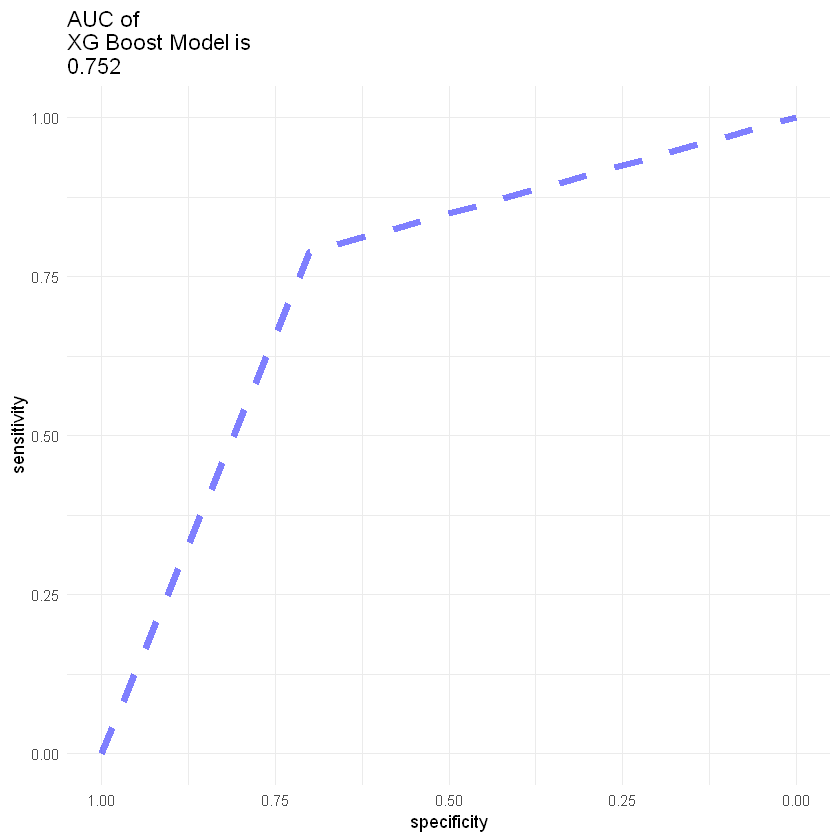

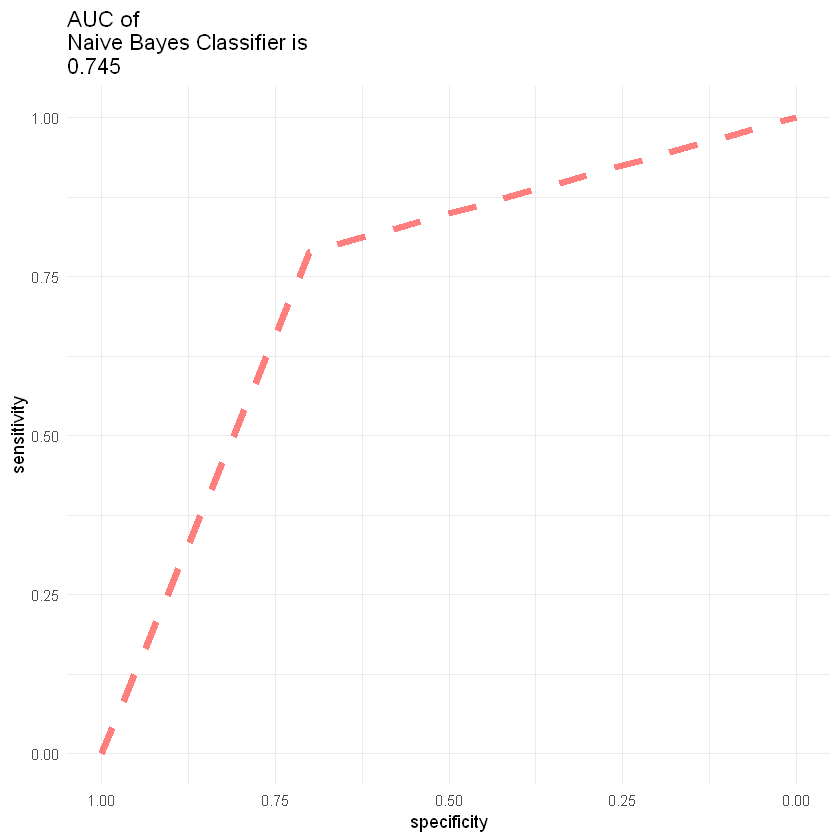

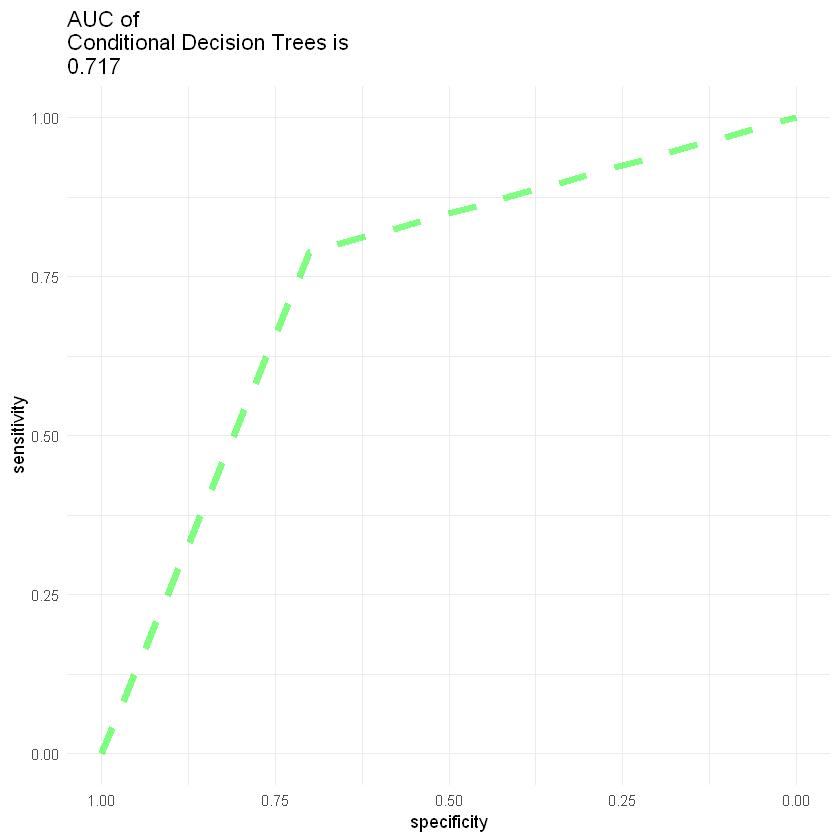

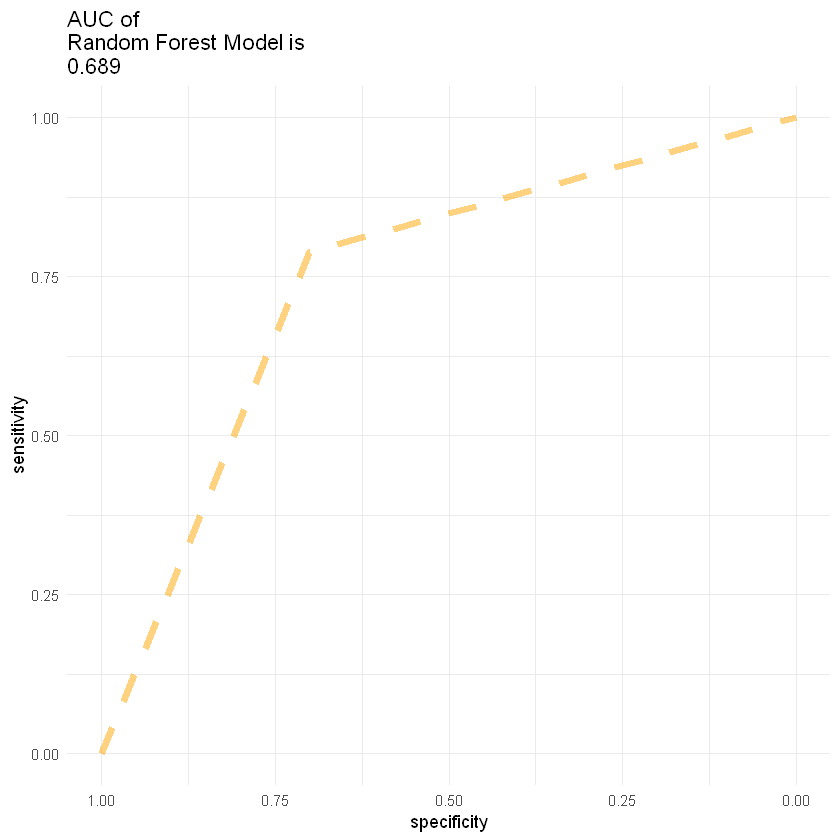

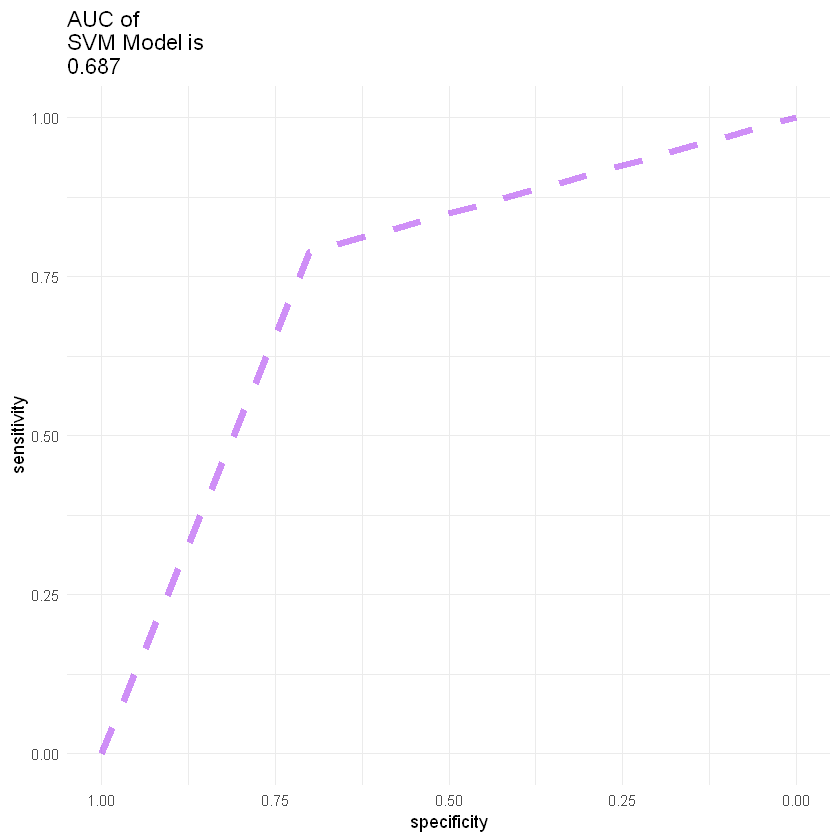

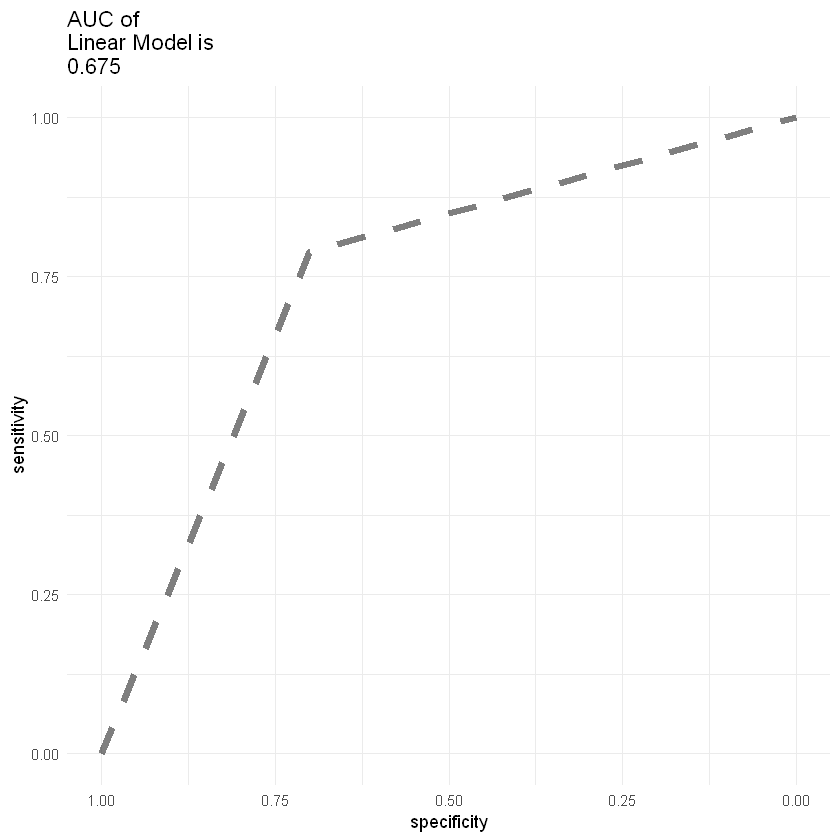

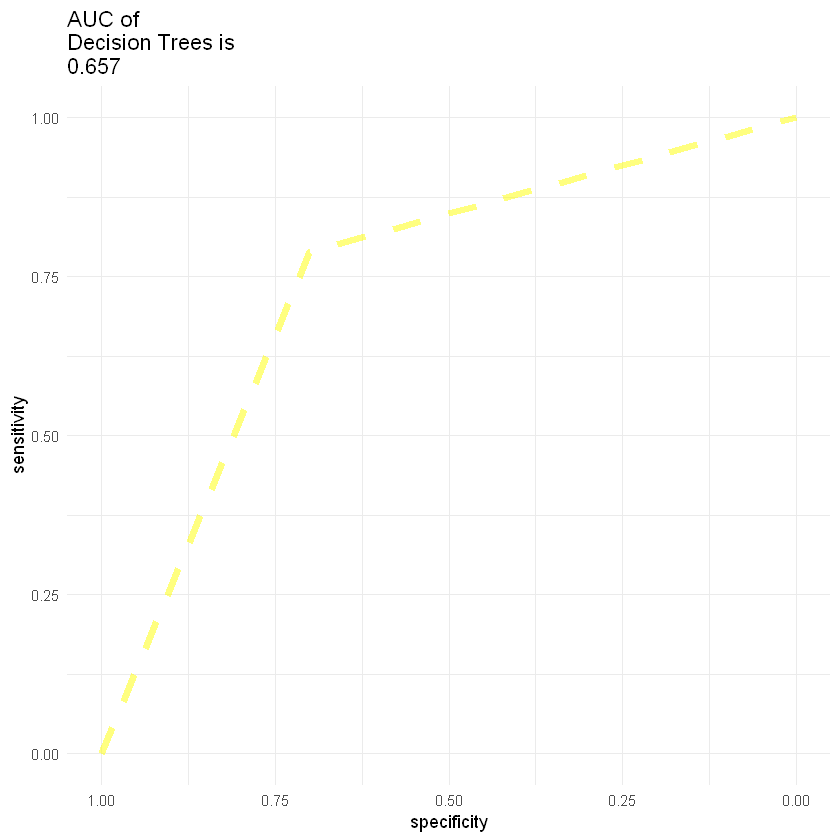

In [456]:
ggroc(roc_obj, alpha = 0.5, colour = "blue", linetype = 2, size = 2)+ theme_minimal() + ggtitle(paste0("AUC of","\n", "XG Boost Model is", "\n", round(roc_obj11$auc,3)))
ggroc(roc_obj, alpha = 0.5, colour = "red", linetype = 2, size = 2)+ theme_minimal() + ggtitle(paste0("AUC of","\n", "Naive Bayes Classifier is", "\n", round(roc_obj7$auc,3)))

ggroc(roc_obj, alpha = 0.5, colour = "green", linetype = 2, size = 2)+ theme_minimal() + ggtitle(paste0("AUC of","\n", "Conditional Decision Trees is", "\n", round(roc_obj0$auc,3)))
ggroc(roc_obj, alpha = 0.5, colour = "orange", linetype = 2, size = 2)+ theme_minimal() + ggtitle(paste0("AUC of","\n", "Random Forest Model is", "\n", round(roc_obj5$auc,3)))
ggroc(roc_obj, alpha = 0.5, colour = "purple", linetype = 2, size = 2)+ theme_minimal() + ggtitle(paste0("AUC of","\n", "SVM Model is", "\n", round(roc_obj1$auc,3)))
ggroc(roc_obj, alpha = 0.5, colour = "black", linetype = 2, size = 2)+ theme_minimal() + ggtitle(paste0("AUC of","\n", "Linear Model is", "\n", round(roc_objl$auc,3)))

ggroc(roc_obj, alpha = 0.5, colour = "yellow", linetype = 2, size = 2)+ theme_minimal() + ggtitle(paste0("AUC of","\n", "Decision Trees is", "\n", round(roc_obj4$auc,3)))



# Ensemble Models

In [457]:
install.packages('caretEnsemble')


Installing package into 'C:/Users/ajaohri/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
Warning message:
"package 'caretEnsemble' is in use and will not be installed"

In [471]:
install.packages("SuperLearner")


Installing package into 'C:/Users/ajaohri/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
also installing the dependencies 'nnls', 'cvAUC'



package 'nnls' successfully unpacked and MD5 sums checked
package 'cvAUC' successfully unpacked and MD5 sums checked
package 'SuperLearner' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ajaohri\AppData\Local\Temp\Rtmpsrvaah\downloaded_packages


In [472]:
library(SuperLearner)

Loading required package: nnls
Super Learner
Version: 2.0-24
Package created on 2018-08-10



In [487]:

train <- telecom[train,]
test <- telecom[validate,]

ERROR: Error in FUN(X[[i]], ...): invalid subscript type 'list'


In [488]:
str(train)

Classes 'tbl_df', 'tbl' and 'data.frame':	4922 obs. of  21 variables:
 $ customerID      : chr  "1450-GALXR" "1088-CNNKB" "7734-DBOAI" "1482-OXZSY" ...
 $ gender          : Factor w/ 2 levels "Female","Male": 1 2 1 2 1 1 2 1 1 1 ...
 $ SeniorCitizen   : int  0 0 0 0 0 0 0 0 1 1 ...
 $ Partner         : Factor w/ 2 levels "No","Yes": 1 2 2 1 1 1 2 2 1 2 ...
 $ Dependents      : Factor w/ 2 levels "No","Yes": 1 1 2 1 1 1 1 2 1 1 ...
 $ tenure          : int  10 63 1 30 39 8 47 68 72 18 ...
 $ PhoneService    : Factor w/ 2 levels "No","Yes": 2 2 1 2 1 2 2 2 2 1 ...
 $ MultipleLines   : Factor w/ 3 levels "No","No phone service",..: 3 3 2 3 2 1 3 3 3 2 ...
 $ InternetService : Factor w/ 3 levels "DSL","Fiber optic",..: 2 1 1 2 1 1 2 2 2 1 ...
 $ OnlineSecurity  : Factor w/ 3 levels "No","No internet service",..: 1 3 1 3 3 3 1 1 3 1 ...
 $ OnlineBackup    : Factor w/ 3 levels "No","No internet service",..: 1 3 1 1 3 1 3 3 3 1 ...
 $ DeviceProtection: Factor w/ 3 levels "No","No internet ser

In [482]:
head(train)

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1450-GALXR,Female,0,No,No,10,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,98.50,1058.25,1
1088-CNNKB,Male,0,Yes,No,63,Yes,Yes,DSL,Yes,...,Yes,Yes,No,Yes,One year,No,Credit card (automatic),80.00,5040.20,0
7734-DBOAI,Female,0,Yes,Yes,1,No,No phone service,DSL,No,...,No,Yes,Yes,No,Month-to-month,No,Electronic check,40.10,40.10,1
1482-OXZSY,Male,0,No,No,30,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),100.40,2936.25,0
7325-ENZFI,Female,0,No,No,39,No,No phone service,DSL,Yes,...,No,Yes,No,No,One year,Yes,Bank transfer (automatic),40.30,1630.40,0
7797-EJMDP,Female,0,No,No,8,Yes,No,DSL,Yes,...,No,Yes,No,Yes,Month-to-month,No,Bank transfer (automatic),66.05,574.50,0


In [480]:
str(test)

Classes 'tbl_df', 'tbl' and 'data.frame':	2110 obs. of  21 variables:
 $ customerID      : chr  "7590-VHVEG" "5575-GNVDE" "8191-XWSZG" "4190-MFLUW" ...
 $ gender          : Factor w/ 2 levels "Female","Male": 1 2 1 1 1 1 2 1 2 1 ...
 $ SeniorCitizen   : int  0 0 0 0 0 1 1 0 0 0 ...
 $ Partner         : Factor w/ 2 levels "No","Yes": 2 1 1 2 1 2 2 1 1 1 ...
 $ Dependents      : Factor w/ 2 levels "No","Yes": 1 1 1 2 2 1 1 1 1 1 ...
 $ tenure          : int  1 34 52 10 17 71 2 46 34 11 ...
 $ PhoneService    : Factor w/ 2 levels "No","Yes": 1 2 2 2 2 2 2 2 2 2 ...
 $ MultipleLines   : Factor w/ 3 levels "No","No phone service",..: 2 1 1 1 1 3 1 1 3 3 ...
 $ InternetService : Factor w/ 3 levels "DSL","Fiber optic",..: 1 1 3 1 1 2 2 2 2 2 ...
 $ OnlineSecurity  : Factor w/ 3 levels "No","No internet service",..: 1 3 2 1 1 3 1 1 1 1 ...
 $ OnlineBackup    : Factor w/ 3 levels "No","No internet service",..: 3 1 2 1 1 3 1 1 3 1 ...
 $ DeviceProtection: Factor w/ 3 levels "No","No internet ser

In [481]:
head(test)

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
8191-XWSZG,Female,0,No,No,52,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,0
4190-MFLUW,Female,0,Yes,Yes,10,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,No,Credit card (automatic),55.20,528.35,1
8773-HHUOZ,Female,0,No,Yes,17,Yes,No,DSL,No,...,No,No,Yes,Yes,Month-to-month,Yes,Mailed check,64.70,1093.10,1
3841-NFECX,Female,1,Yes,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,No,No,Two year,Yes,Credit card (automatic),96.35,6766.95,0


In [502]:
y <- as.numeric(unlist(train[,21]))
ytest <- as.numeric(unlist(test[,21]))

In [495]:
 x <- train[,1:20]
xtest <- test[,1:20]

In [496]:
listWrappers()


All prediction algorithm wrappers in SuperLearner:



 [1] "SL.bartMachine"      "SL.bayesglm"         "SL.biglasso"        
 [4] "SL.caret"            "SL.caret.rpart"      "SL.cforest"         
 [7] "SL.dbarts"           "SL.earth"            "SL.extraTrees"      
[10] "SL.gam"              "SL.gbm"              "SL.glm"             
[13] "SL.glm.interaction"  "SL.glmnet"           "SL.ipredbagg"       
[16] "SL.kernelKnn"        "SL.knn"              "SL.ksvm"            
[19] "SL.lda"              "SL.leekasso"         "SL.lm"              
[22] "SL.loess"            "SL.logreg"           "SL.mean"            
[25] "SL.nnet"             "SL.nnls"             "SL.polymars"        
[28] "SL.qda"              "SL.randomForest"     "SL.ranger"          
[31] "SL.ridge"            "SL.rpart"            "SL.rpartPrune"      
[34] "SL.speedglm"         "SL.speedlm"          "SL.step"            
[37] "SL.step.forward"     "SL.step.interaction" "SL.stepAIC"         
[40] "SL.svm"              "SL.template"         "SL.xgboost"         



All screening algorithm wrappers in SuperLearner:



[1] "All"
[1] "screen.corP"           "screen.corRank"        "screen.glmnet"        
[4] "screen.randomForest"   "screen.SIS"            "screen.template"      
[7] "screen.ttest"          "write.screen.template"


In [498]:
install.packages('arm')

Installing package into 'C:/Users/ajaohri/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
also installing the dependency 'coda'



package 'coda' successfully unpacked and MD5 sums checked
package 'arm' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ajaohri\AppData\Local\Temp\Rtmpsrvaah\downloaded_packages


In [ ]:
    # Fit the ensemble model
    model <- SuperLearner(y,
                          x,
                          family=binomial(),
                          SL.library=list("SL.ranger",
                                          "SL.ksvm",
                                          "SL.ipredbagg",
                                          "SL.bayesglm"))

    # Return the model
    model

Loading required package: ranger
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'ranger'"Warning message in FUN(X[[i]], ...):
"Error in algorithm SL.ranger 
  The Algorithm will be removed from the Super Learner (i.e. given weight 0) 
"

In [ ]:
install.packages('ranger')